# DEBUT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
import statsmodels.api as sm
import scipy.stats as st
import missingno as msno
from statistics import mean, stdev

from sklearn.dummy import DummyRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn import neighbors
from sklearn import linear_model
from sklearn import ensemble
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap

# Suppress FutureWarnings
#import warnings
#warnings.filterwarnings('ignore', category=FutureWarning)

data = pd.read_csv('P4-cleaned.csv')

data.shape

(1526, 25)

In [2]:
data.head()

,BuildingType,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),PercentagePropertyGFABuildings,...,SecondLargestPropertyUseTypeGFAPourcentage,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFAPourcentage,ENERGYSTARScore,PercentageSteamUse(kBtu),PercentageElectricity(kBtu),SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,DOWNTOWN,89,1,12,88434,0,88434,100.0,...,NaN,NaN,NaN,60.0,27.0,53.0,7456910.0,84.300003,249.98,2.83
1,NonResidential,Hotel,DOWNTOWN,20,1,11,103566,15064,88502,85.0,...,15.0,Restaurant,4.0,61.0,0.0,37.0,8664479.0,97.900002,295.86,2.86
2,NonResidential,Hotel,DOWNTOWN,47,1,41,956110,196718,759392,79.0,...,NaN,NaN,NaN,43.0,29.0,67.0,73937112.0,97.699997,2089.28,2.19
3,NonResidential,Hotel,DOWNTOWN,90,1,10,61320,0,61320,100.0,...,NaN,NaN,NaN,56.0,32.0,40.0,6946800.5,113.300003,286.43,4.67
4,NonResidential,Hotel,DOWNTOWN,36,1,18,175580,62000,113580,65.0,...,39.0,Swimming Pool,0.0,75.0,0.0,37.0,14656503.0,118.699997,505.01,2.88


In [3]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'PercentagePropertyGFABuildings', 'GFAperBuilding', 'GFAperFloor',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
       'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFAPourcentage',
       'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFAPourcentage', 'ENERGYSTARScore',
       'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [4]:
data.describe()

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),PercentagePropertyGFABuildings,GFAperBuilding,GFAperFloor,LargestPropertyUseTypeGFAPourcentage,SecondLargestPropertyUseTypeGFAPourcentage,ThirdLargestPropertyUseTypeGFAPourcentage,ENERGYSTARScore,PercentageSteamUse(kBtu),PercentageElectricity(kBtu),SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
count,1526.000000,1526.000000,1526.000000,1.526000e+03,1526.000000,1.526000e+03,1526.000000,1.526000e+03,1.526000e+03,1526.000000,828.000000,338.000000,985.000000,1526.000000,1526.000000,1.526000e+03,1526.000000,1526.000000,1526.000000
mean,54.443644,1.142857,4.208388,1.148438e+05,13720.039974,1.011238e+05,93.538663,9.496000e+04,2.954299e+04,86.433814,23.913043,10.047337,63.481218,2.103539,67.493447,8.520320e+06,78.148886,187.339993,1.677870
std,32.777948,1.187050,6.279278,1.971065e+05,43780.809950,1.748421e+05,14.347107,1.633201e+05,4.517597e+04,31.217154,17.219956,9.932598,28.882927,8.791413,27.002895,2.291256e+07,76.441349,732.444437,2.421649
min,1.000000,1.000000,1.000000,1.128500e+04,0.000000,3.636000e+03,10.000000,3.636000e+03,1.433000e+03,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.811420e+04,1.500000,0.000000,0.000000
25%,28.000000,1.000000,1.000000,2.881100e+04,0.000000,2.791425e+04,100.000000,2.728700e+04,1.174325e+04,68.000000,11.000000,3.000000,43.000000,0.000000,46.000000,1.337961e+06,37.299999,20.505000,0.360000
50%,51.000000,1.000000,2.000000,4.801300e+04,0.000000,4.606350e+04,100.000000,4.476500e+04,2.000000e+04,94.000000,23.000000,7.000000,71.000000,0.000000,68.000000,2.831452e+06,56.350000,49.940000,0.890000
75%,86.000000,1.000000,4.000000,1.060308e+05,0.000000,9.485325e+04,100.000000,9.039575e+04,3.110400e+04,100.000000,34.000000,15.000000,88.000000,0.000000,95.000000,7.570002e+06,88.300003,147.105000,1.980000
max,116.000000,27.000000,76.000000,2.200000e+06,512608.000000,2.200000e+06,100.000000,2.200000e+06,1.100000e+06,643.000000,145.000000,93.000000,100.000000,65.000000,104.000000,4.716139e+08,834.400024,16870.980000,34.090000


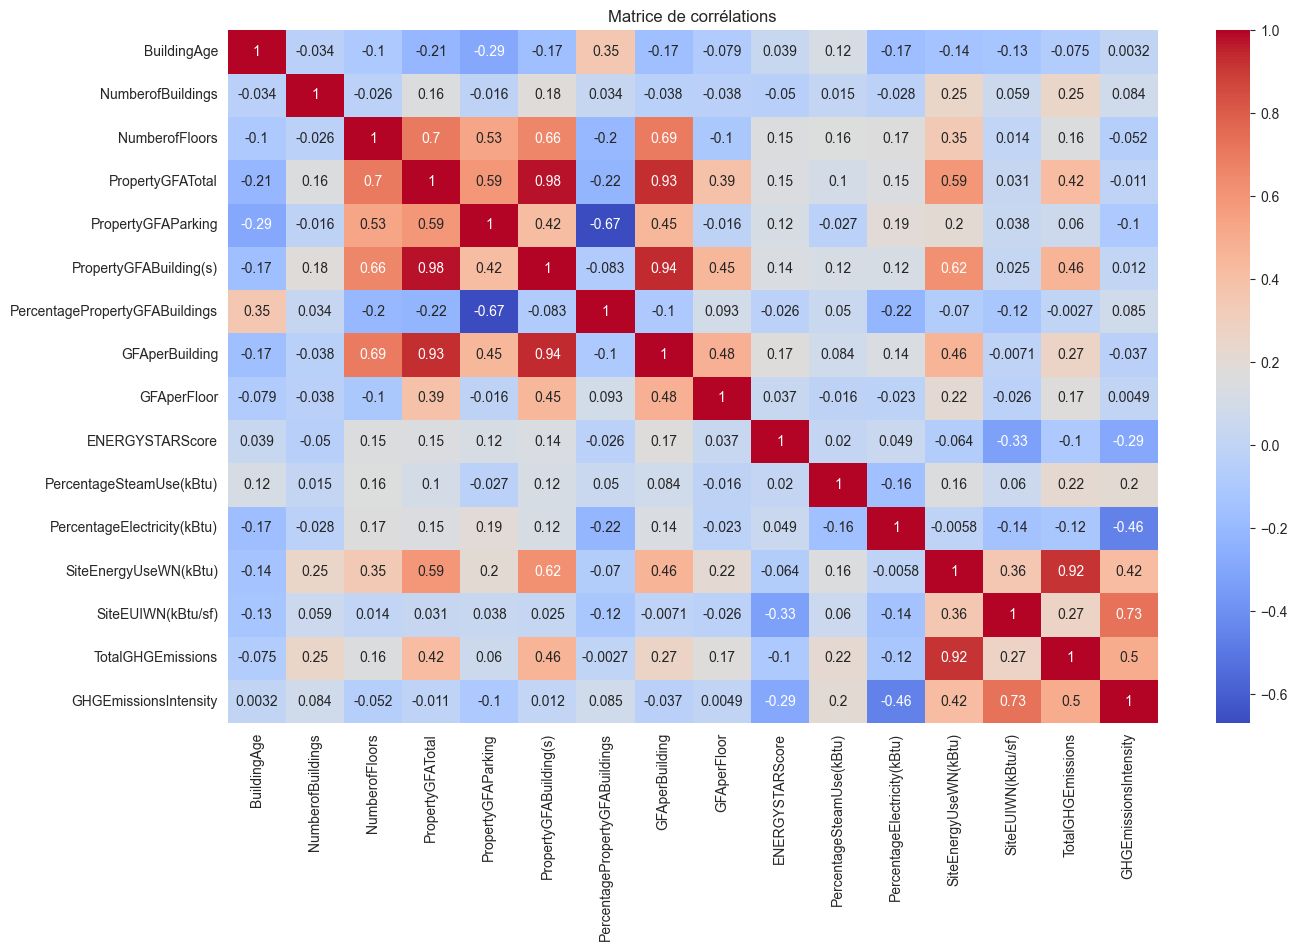

In [5]:
correl = data.drop(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFAPourcentage',
       'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFAPourcentage'], axis=1).corr()

plt.subplots(figsize=(15, 9))
sns.heatmap(correl, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélations')
plt.show()

# Préparation du dataset

## Initialisation des variables et classification de la cible

La variable cible qu'on cherche à calculer est TotalGHGEmissions.

In [6]:
y = data['TotalGHGEmissions']

Je vais créer plusieurs DataFrames X_V... pour tester plusieurs ensembles de features et voir lequel performe le mieux.  
Les features toujours utilisées sont 'BuildingAge', 'NumberofBuildings', 'NumberofFloors', 'PercentageSteamUse(kBtu)' et 'PercentageElectricity(kBtu)'.  
Pour prendre en compte la surface de nos individus, nous avons 2 groupes de features différents :  
- 'PropertyGFAParking', 'GFAperBuilding'.  
- 'PropertyGFATotal', 'PercentagePropertyGFABuildings'.  

Nous aurons également 2 possibilités différentes pour le type de building :  
- 'PrimaryPropertyType'.  
- 'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFAPourcentage', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage'.  

Cela nous fait 4 X différents.  
Pour chacun de ces 4 X, nous aurons par défaut les features 'BuildingType' et 'Neighborhood' d'intégrés. Mais je vais également créer une version bis sans ces 2 features.  

V1 correspond au colonne de base avec 'PropertyGFAParking', 'GFAperBuilding' et seulement PrimaryPropertyType comme type de buildings.  
On fera un OneHotEncoding binaire classique sur ce dernier.

In [7]:
col_V1 = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge', 'NumberofBuildings', 'NumberofFloors',
            'PropertyGFAParking', 'GFAperBuilding', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)']
col_categ_V1 = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood']
X_V1 = data[col_V1]

Les colonnes bis sont les mêmes avec suppression de 'BuildingType' et 'Neighborhood'.

In [8]:
col_V1bis = ['PrimaryPropertyType', 'BuildingAge', 'NumberofBuildings', 'NumberofFloors',
            'PropertyGFAParking', 'GFAperBuilding', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)']
col_categ_V1bis = ['PrimaryPropertyType']
X_V1bis = data[col_V1bis]

V2 remplace ['PropertyGFAParking', 'GFAperBuilding'] par ['PropertyGFATotal', 'PercentagePropertyGFABuildings']

In [9]:
col_V2 = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge', 'PropertyGFATotal', 'NumberofBuildings', 'NumberofFloors',
            'PercentagePropertyGFABuildings', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)']
col_categ_V2 = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood']
X_V2 = data[col_V2]

In [10]:
col_V2bis = ['PrimaryPropertyType', 'BuildingAge', 'PropertyGFATotal', 'NumberofBuildings', 'NumberofFloors',
            'PercentagePropertyGFABuildings', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)']
col_categ_V2bis = ['PrimaryPropertyType']
X_V2bis = data[col_V2bis]

V3 correspond à V1 mais cette fois, on enlève PrimaryPropertyType et on remplace par l'ensemble des colonnes LargestPropertyType, SecondLargest, etc...  
On fera un OneHotEncoding plus "intelligent" en assignant la valeur du pourcentage de la superficie du type de batiment s'il est présent pour notre individu.  

In [11]:
col_V3 = [
    'BuildingType', 'LargestPropertyUseType',
    'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFAPourcentage', 'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFAPourcentage', 'Neighborhood', 'BuildingAge',
    'PropertyGFAParking', 'GFAperBuilding',
    'NumberofBuildings', 'NumberofFloors', 'PercentageSteamUse(kBtu)',
    'PercentageElectricity(kBtu)'
]

X_V3 = data[col_V3]
col_categ_V3 = ['BuildingType', 'Neighborhood']

In [12]:
col_V3bis = [
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage',
    'BuildingAge', 'PropertyGFAParking', 'GFAperBuilding',
    'NumberofBuildings', 'NumberofFloors', 'PercentageSteamUse(kBtu)',
    'PercentageElectricity(kBtu)'
]

X_V3bis = data[col_V3bis]

V4 correspond à V2 mais cette fois, on enlève PrimaryPropertyType et on remplace par l'ensemble des colonnes LargestPropertyType, SecondLargest, etc...  
On fera un OneHotEncoding plus "intelligent" en assignant la valeur du pourcentage de la superficie du type de batiment s'il est présent pour notre individu.  

In [13]:
col_V4 = [
    'BuildingType', 'LargestPropertyUseType', 
    'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFAPourcentage',  'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFAPourcentage', 'Neighborhood', 'BuildingAge',
    'PropertyGFATotal', 'PercentagePropertyGFABuildings',
    'NumberofBuildings', 'NumberofFloors', 'PercentageSteamUse(kBtu)',
    'PercentageElectricity(kBtu)'
]

X_V4 = data[col_V4]

col_categ_V4 = ['BuildingType', 'Neighborhood']

In [14]:
col_V4bis = [
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage',
    'BuildingAge', 'PropertyGFATotal', 
    'PercentagePropertyGFABuildings', 'NumberofBuildings', 'NumberofFloors',
    'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)'
]

X_V4bis = data[col_V4bis]

Ajout d'une colonne Bin_TotalGHGEmissions qui permet de regrouper les valeurs de TotalGHGEmissions en 10 quantiles afin de pouvoir faire un StratifiedKFold sur la donnée.

In [15]:
bins_TotalGHGEmissions = pd.qcut(data['TotalGHGEmissions'], q=10, labels=False, precision=0)
data['Bin_TotalGHGEmissions'] = bins_TotalGHGEmissions

y_class = data['Bin_TotalGHGEmissions']

data


,BuildingType,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),PercentagePropertyGFABuildings,...,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFAPourcentage,ENERGYSTARScore,PercentageSteamUse(kBtu),PercentageElectricity(kBtu),SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,Bin_TotalGHGEmissions
0,NonResidential,Hotel,DOWNTOWN,89,1,12,88434,0,88434,100.0,...,NaN,NaN,60.0,27.0,53.0,7.456910e+06,84.300003,249.98,2.83,8
1,NonResidential,Hotel,DOWNTOWN,20,1,11,103566,15064,88502,85.0,...,Restaurant,4.0,61.0,0.0,37.0,8.664479e+06,97.900002,295.86,2.86,8
2,NonResidential,Hotel,DOWNTOWN,47,1,41,956110,196718,759392,79.0,...,NaN,NaN,43.0,29.0,67.0,7.393711e+07,97.699997,2089.28,2.19,9
3,NonResidential,Hotel,DOWNTOWN,90,1,10,61320,0,61320,100.0,...,NaN,NaN,56.0,32.0,40.0,6.946800e+06,113.300003,286.43,4.67,8
4,NonResidential,Hotel,DOWNTOWN,36,1,18,175580,62000,113580,65.0,...,Swimming Pool,0.0,75.0,0.0,37.0,1.465650e+07,118.699997,505.01,2.88,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,Nonresidential COS,Other,DELRIDGE,34,1,1,18261,0,18261,100.0,...,NaN,NaN,NaN,0.0,62.0,1.025432e+06,56.200001,20.33,1.11,2
1522,Nonresidential COS,Other,DOWNTOWN,12,1,1,16000,0,16000,100.0,...,NaN,NaN,NaN,0.0,38.0,1.053706e+06,65.900002,32.17,2.01,3
1523,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,42,1,1,13157,0,13157,100.0,...,Swimming Pool,0.0,NaN,0.0,30.0,6.053764e+06,460.100006,223.54,16.99,8
1524,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,27,1,1,14101,0,14101,100.0,...,Pre-school/Daycare,3.0,NaN,0.0,45.0,7.828413e+05,55.500000,22.11,1.57,2


Création d'un Dataframe results qui stockera les scores de chacun des modèles.  
La colonne WithTransform correspondra au meilleur score après transformation sur les données (PowerTransformer, RobustScaler...) .

In [16]:
results = pd.DataFrame(columns=['V1', 'V2', 'V3', 'V4', 'WithTransform'], 
                       index=['DummyRegressor', 'LinearRegressor', 'Lasso', 'Ridge', 'ElasticNet', 
                              'XGBRegressor', 'GradientBoostingRegressor', 'RandomForest'])

## Encoding des variables catégorielles

OneHotEncoding simple via la fonction get_dummies de Pandas sur les colonnes catégorielles, à savoir ['BuildingType', 'PrimaryPropertyType', 'Neighborhood'] selon lesquelles sont présentes dans chaque version de X.

In [17]:
X_categ_V1 = pd.get_dummies(data[col_categ_V1]).astype(int)
X_V1 = pd.concat([X_V1.drop(columns=col_categ_V1), X_categ_V1], axis=1)

X_V1

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFAParking,GFAperBuilding,PercentageSteamUse(kBtu),PercentageElectricity(kBtu),BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,89,1,12,0,88434.0,27.0,53.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,20,1,11,15064,88502.0,0.0,37.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,47,1,41,196718,759392.0,29.0,67.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,90,1,10,0,61320.0,32.0,40.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,36,1,18,62000,113580.0,0.0,37.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,34,1,1,0,18261.0,0.0,62.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1522,12,1,1,0,16000.0,0.0,38.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1523,42,1,1,0,13157.0,0.0,30.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1524,27,1,1,0,14101.0,0.0,45.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [18]:
X_categ_V1bis = pd.get_dummies(data[col_categ_V1bis]).astype(int)
X_V1bis = pd.concat([X_V1bis.drop(columns=col_categ_V1bis), X_categ_V1bis], axis=1)

In [19]:
X_categ_V2 = pd.get_dummies(data[col_categ_V2]).astype(int)
X_V2 = pd.concat([X_V2.drop(columns=col_categ_V2), X_categ_V2], axis=1)

X_categ_V2bis = pd.get_dummies(data[col_categ_V2bis]).astype(int)
X_V2bis = pd.concat([X_V2bis.drop(columns=col_categ_V2bis), X_categ_V2bis], axis=1)

In [20]:
X_categ_V3 = pd.get_dummies(data[col_categ_V3]).astype(int)
X_V3 = pd.concat([X_V3.drop(columns=col_categ_V3), X_categ_V3], axis=1)

In [21]:
X_categ_V4 = pd.get_dummies(data[col_categ_V4]).astype(int)
X_V4 = pd.concat([X_V4.drop(columns=col_categ_V4), X_categ_V4], axis=1)

Pour X_V3 et X_V4 :

Factorisation des différentes valeurs de 'LargestPropertyUseType', 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType' pour n'avoir qu'au total environ 15/20 types différents et ainsi éviter les colonnes quasiment vide.  
J'ai tenté 2 façons de factoriser, je vais donc créer des copies de X_V3 et X_V4 pour comparer quelle est la meilleure méthode. Cette 2eme méthode sera suffixée d'un _B.

In [22]:
X_V3_B = X_V3.copy()
X_V3bis_B = X_V3bis.copy()
X_V4_B = X_V4.copy()
X_V4bis_B = X_V4bis.copy()

OneHotEncoding numéro 1 :  
Je regroupe les types proches sous un même nom et je mets certains types peu représentés et qui ne vont dans aucune autre catégorie dans Other.

In [23]:
for df in [X_V3, X_V3bis, X_V4, X_V4bis]:
    for i in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
        for j in ['Financial Office', 'Medical Office']:
            df.loc[df[i]==j, i] = 'Office'
        for j in ['Convenience Store without Gas Station', 'Automobile Dealership', 'Repair Services (Vehicle, Shoe, Locksmith, etc)']:
            df.loc[df[i]==j, i] = 'Basic Store'
        for j in ['Strip Mall', 'Other - Mall', 'Enclosed Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center']:
            df.loc[df[i]==j, i] = 'Mall'
        for j in ['Other - Restaurant/Bar', 'Fast Food Restaurant']:
            df.loc[df[i]==j, i] = 'Restaurant'
        for j in ['Other - Entertainment/Public Assembly', 'Social/Meeting Hall', 'Library', 'Museum', 'Performing Arts', 
                  'Other - Public Services', 'Fire Station', 'Police Station', 'Movie Theater', 'Courthouse']:
            df.loc[df[i]==j, i] = 'PublicSpaces'
        for j in ['Distribution Center', 'Refrigerated Warehouse', 'Manufacturing/Industrial Plant']:
            df.loc[df[i]==j, i] = 'Refrigerated Warehouse'
        for j in ['Non-Refrigerated Warehouse', 'Self-Storage Facility']:
            df.loc[df[i]==j, i] = 'Non-Refrigerated Warehouse'
        for j in ['Residence Hall/Dormitory', 'Senior Care Community', 'Multifamily Housing', 'Other - Lodging/Residential', 
                  'Prison/Incarceration', 'Residential Care Facility']:
            df.loc[df[i]==j, i] = 'EverydayLife'
        for j in ['Laboratory', 'Other - Technology/Science', 'Data Center']:
            df.loc[df[i]==j, i] = 'TechBuildings'
        for j in ['Other - Services', 'Other - Utility', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 
                  'Other/Specialty Hospital', 'Urgent Care/Clinic/Other Outpatient', 'Food Service', 
                  'Food Sales''Other - Education', 'Adult Education', 'Vocational School', 'Pre-school/Daycare', 
                  'Swimming Pool', 'Bank Branch', 'Other - Recreation', 'Fitness Center/Health Club/Gym', 'Bar/Nightclub']:
            df.loc[df[i]==j, i] = 'Other'
        

Je récupère les types uniques que nous avons et les mets dans une liste AllType.  
J'utilise cette liste pour créer autant de nouvelles colonnes dans notre DataFrame que de variable dans la liste. J'initialise le tout à 0.  
Ensuite je remplis en fonction des couples de colonnes [LargestPropertyUseType/LargestPropertyUseTypeGFAPourcentage]...

In [24]:
lst_1largest = X_V3['LargestPropertyUseType'].unique().tolist()
lst_2largest = X_V3['SecondLargestPropertyUseType'].dropna().unique().tolist()
lst_3largest = X_V3['ThirdLargestPropertyUseType'].dropna().unique().tolist()

AllType = list(set(lst_1largest+lst_2largest+lst_3largest))
        
for df in [X_V3, X_V3bis, X_V4, X_V4bis]:   
    for value in AllType:
        df[value]=0.0
    for index, row in df.iterrows():
        df.loc[index, row['LargestPropertyUseType']] = row['LargestPropertyUseTypeGFAPourcentage']
        if pd.notna(row['SecondLargestPropertyUseType']):
            df.loc[index, row['SecondLargestPropertyUseType']] = row['SecondLargestPropertyUseTypeGFAPourcentage']
        if pd.notna(row['ThirdLargestPropertyUseType']):
            df.loc[index, row['ThirdLargestPropertyUseType']] = row['ThirdLargestPropertyUseTypeGFAPourcentage']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

OneHotEncoding numéro 2 :  
Cette approche plus "simpliste" récupère les LargestPropertyUseType peu représentés et les mets automatiquement dans Other (sauf quelques exceptions).  
On se rapproche plus de la distribution du PrimaryPropertyType, avec beaucoup de données dans Other, ainsi on évite de faire des erreurs dans les autres types.  

In [25]:
LstLargestLower10 = data['LargestPropertyUseType'].value_counts()[data['LargestPropertyUseType'].value_counts()<10].index.tolist()

for dfbis in [X_V3_B, X_V3bis_B, X_V4_B, X_V4bis_B]:
    for i in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
        for j in ['Wholesale Club/Supercenter']:
            dfbis.loc[dfbis[i]==j, i] = 'Supermarket/Grocery Store'
        for j in ['Other - Entertainment/Public Assembly', 'Other - Recreation']:
            dfbis.loc[dfbis[i]==j, i] = 'Other'
        for j in LstLargestLower10:
            dfbis.loc[dfbis[i]==j, i] = 'Other'

Pour l'attribution des pourcentages, la méthode reste la même.  
Ici j'ai une vérification en plus sur SecondLargestPropertyUseType et ThirdLargestPropertyUseType car je ne les ai pas pris en compte lors du choix de mes différent types.  

In [26]:
lst_1largest_bis = X_V3_B['LargestPropertyUseType'].unique().tolist()

for dfbis in [X_V3_B, X_V3bis_B, X_V4_B, X_V4bis_B]:
    for value in lst_1largest_bis:
        dfbis[value]=0.0
    for index, row in dfbis.iterrows():
        dfbis.loc[index, row['LargestPropertyUseType']] = row['LargestPropertyUseTypeGFAPourcentage']
        if pd.notna(row['SecondLargestPropertyUseType']):
            if row['SecondLargestPropertyUseType'] in lst_1largest_bis:
                dfbis.loc[index, row['SecondLargestPropertyUseType']] = row['SecondLargestPropertyUseTypeGFAPourcentage']
            else:
                dfbis.loc[index, 'Other'] = row['SecondLargestPropertyUseTypeGFAPourcentage']
        if pd.notna(row['ThirdLargestPropertyUseType']):
            if row['ThirdLargestPropertyUseType'] in lst_1largest_bis:
                dfbis.loc[index, row['ThirdLargestPropertyUseType']] = row['ThirdLargestPropertyUseTypeGFAPourcentage']
            else:
                dfbis.loc[index, 'Other'] = row['ThirdLargestPropertyUseTypeGFAPourcentage']

In [27]:
X_V3.loc[:,['LargestPropertyUseType',
            'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
           'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage', 'Hotel', 'Parking', 'Restaurant']]

,LargestPropertyUseType,LargestPropertyUseTypeGFAPourcentage,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFAPourcentage,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFAPourcentage,Hotel,Parking,Restaurant
0,Hotel,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0
1,Hotel,81.0,Parking,15.0,Restaurant,4.0,81.0,15.0,4.0
2,Hotel,79.0,NaN,NaN,NaN,NaN,79.0,0.0,0.0
3,Hotel,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0
4,Hotel,70.0,Parking,39.0,Other,0.0,70.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...
1521,Other,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1522,Other,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1523,Other,58.0,Other,42.0,Other,0.0,0.0,0.0,0.0
1524,Other,47.0,Other,46.0,Other,3.0,0.0,0.0,0.0


In [28]:
X_V4bis_B.loc[:, ['LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
                  'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage', 'Hotel', 'Parking', 'Restaurant']]

,LargestPropertyUseType,LargestPropertyUseTypeGFAPourcentage,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFAPourcentage,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFAPourcentage,Hotel,Parking,Restaurant
0,Hotel,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0
1,Hotel,81.0,Parking,15.0,Restaurant,4.0,81.0,15.0,4.0
2,Hotel,79.0,NaN,NaN,NaN,NaN,79.0,0.0,0.0
3,Hotel,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0
4,Hotel,70.0,Parking,39.0,Swimming Pool,0.0,70.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...
1521,Other,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1522,Other,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1523,Other,58.0,Other,42.0,Swimming Pool,0.0,0.0,0.0,0.0
1524,Other,47.0,Other,46.0,Other,3.0,0.0,0.0,0.0


Suppression des colonnes inutiles après le OneHotEncoding.

In [29]:
for alldf in [X_V3, X_V3bis, X_V4, X_V4bis, X_V3_B, X_V3bis_B, X_V4_B, X_V4bis_B]:
    alldf.drop(columns=[
        'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
        'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
        'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage'
    ], inplace=True)

# Modélisation

## Fonctions communes

In [30]:
def affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae):
    print('Evaluation sur le training set :')
    print(f'List of possible accuracy: {lst_score_train}')
    print(f'Overall Accuracy: {mean(lst_score_train)}')
    print(f'Standard Deviation : {stdev(lst_score_train)}')

    print('\nEvaluation sur le testing set (R²):')
    print(f'List of possible accuracy: {lst_score_test}')
    print(f'Overall Accuracy: {mean(lst_score_test)}')
    print(f'Standard Deviation : {stdev(lst_score_test)}')
    
    
    print(f'\nList of RMSE: {lst_rmse}')
    print(f'Overall RMSE: {mean(lst_rmse)}')
    print(f'Standard Deviation RMSE: {stdev(lst_rmse)}')

    print(f'\nList of MAE: {lst_mae}')
    print(f'Overall MAE: {mean(lst_mae)}')
    print(f'Standard Deviation MAE: {stdev(lst_mae)}')

In [31]:
def modelisation(model, X):
    lst_score_train = []
    lst_score_test = []
    lst_rmse = []
    lst_mae = []

    # Create StratifiedKFold object.
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

    for train_index, test_index in skf.split(X, y_class):
        x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        model.fit(x_train_fold, y_train_fold)
        y_pred = model.predict(x_test_fold)

        #La fonction score retourne le coéfficient de détermination
        lst_score_train.append(model.score(x_train_fold, y_train_fold).round(4))
        lst_score_test.append(model.score(x_test_fold, y_test_fold).round(4))

        lst_rmse.append(mean_squared_error(y_test_fold, y_pred, squared=False).round(4))
        lst_mae.append(mean_absolute_error(y_test_fold, y_pred).round(4))
        
    return lst_score_train, lst_score_test, lst_rmse, lst_mae

In [32]:
#Fonction prise dans le cours pour afficher les résultats d'un GridSearch.

def resultizeGrid(grid):
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')
    
    return res

## Dummy

Premier modèle qui servira de base. On prend simplement la moyenne de la cible.

In [33]:
dr = DummyRegressor(strategy="mean")

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(dr, X_V2bis)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['DummyRegressor', 'V2'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall Accuracy: 0.0
Standard Deviation : 0.0

Evaluation sur le testing set (R²):
List of possible accuracy: [-0.0199, -0.0092, -0.0219, -0.0027, -0.08, -0.0002, -0.0362, -0.0182, -0.0023, -0.0047]
Overall Accuracy: -0.019530000000000002
Standard Deviation : 0.024088819444344347

List of RMSE: [330.4561, 1406.0664, 312.6085, 766.9252, 225.0157, 491.4351, 258.0903, 324.14, 379.9204, 1410.6249]
Overall RMSE: 590.52826
Standard Deviation RMSE: 457.3967421379805

List of MAE: [180.0585, 330.9418, 177.0088, 250.8923, 166.8702, 209.6636, 174.6348, 180.4171, 202.2548, 298.3308]
Overall MAE: 217.10727
Standard Deviation MAE: 57.375309755465956


Pour tous les modèles suivants, j'ai testé chacun de mes ensembles de features et gardé le meilleur pour X_V1, V2, etc... en testant plusieurs hyperparamètres.  
J'ai également fait un dernier test avec une transformation sur les features en entrée (RobustScaler ou PowerTransformer car ce sont les deux qui fonctionnent le mieux dans mon cas) et j'ai gardé seulement le meilleur score.  
Pour les tests avec GridSearchCV, la seule métrique utilisée pour calculer les performances sera le score intégré à chaque modèle par souci de simplicité.

## Linear Regression

### X_V1

In [34]:
lr = linear_model.LinearRegression()

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(lr, X_V1bis)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'V1'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.4464, 0.2906, 0.436, 0.3915, 0.4326, 0.4249, 0.4326, 0.4278, 0.4814, 0.6237]
Overall Accuracy: 0.43875000000000003
Standard Deviation : 0.08209747932251703

Evaluation sur le testing set (R²):
List of possible accuracy: [-0.5992, 0.5379, 0.0553, 0.723, 0.1669, 0.5192, 0.0782, 0.5382, -1.9192, 0.0754]
Overall Accuracy: 0.017570000000000006
Standard Deviation : 0.778409319702687

List of RMSE: [413.7949, 951.4295, 300.5737, 403.1335, 197.6288, 340.7382, 243.4235, 218.294, 648.3644, 1353.2383]
Overall RMSE: 507.06188
Standard Deviation RMSE: 375.92629379382277

List of MAE: [176.5034, 231.4051, 142.54, 148.409, 114.9745, 158.8519, 128.1465, 127.9567, 199.8672, 234.8749]
Overall MAE: 166.35292
Standard Deviation MAE: 43.04046426865976


### X_V2

In [35]:
lr = linear_model.LinearRegression()

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(lr, X_V2bis)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'V2'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.4867, 0.3043, 0.4791, 0.4348, 0.4782, 0.4672, 0.4753, 0.4723, 0.5138, 0.6865]
Overall Accuracy: 0.47982
Standard Deviation : 0.09249147468220456

Evaluation sur le testing set (R²):
List of possible accuracy: [-0.3566, 0.6536, 0.1227, 0.7668, -0.1348, 0.5826, 0.2223, 0.4667, -1.386, 0.0926]
Overall Accuracy: 0.10299000000000001
Standard Deviation : 0.6329573786774447

List of RMSE: [381.1186, 823.733, 289.6424, 369.9014, 230.6518, 317.4663, 223.5835, 234.5928, 586.1652, 1340.6234]
Overall RMSE: 479.74784
Standard Deviation RMSE: 356.33887092511065

List of MAE: [178.9995, 226.703, 148.2262, 148.0442, 123.3234, 153.8228, 135.9831, 132.5316, 197.5666, 250.9629]
Overall MAE: 169.61633
Standard Deviation MAE: 42.90461071594494


### X_V3

In [36]:
lr = linear_model.LinearRegression()

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(lr, X_V3bis_B)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'V3'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.4615, 0.4022, 0.4698, 0.4454, 0.4642, 0.4578, 0.4734, 0.465, 0.5185, 0.5493]
Overall Accuracy: 0.47071
Standard Deviation : 0.039621864053967865

Evaluation sur le testing set (R²):
List of possible accuracy: [0.4064, 0.4823, -0.1015, 0.5666, 0.137, 0.53, -0.9821, 0.2367, -2.241, 0.1599]
Overall Accuracy: -0.08057
Standard Deviation : 0.8839345200107679

List of RMSE: [252.0956, 1007.0452, 324.5614, 504.2468, 201.1431, 336.8791, 356.9486, 280.6473, 683.1663, 1289.9572]
Overall RMSE: 523.66906
Standard Deviation RMSE: 362.9862831921651

List of MAE: [161.7421, 244.8503, 156.2732, 178.7655, 123.9797, 165.148, 157.1668, 148.2187, 194.9486, 234.3836]
Overall MAE: 176.54765
Standard Deviation MAE: 38.086901663177535


### X_V4

In [37]:
lr = linear_model.LinearRegression()

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(lr, X_V4bis_B)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'V4'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.5307, 0.4241, 0.5342, 0.5081, 0.5323, 0.5244, 0.5361, 0.5351, 0.574, 0.6362]
Overall Accuracy: 0.53352
Standard Deviation : 0.05260223484901674

Evaluation sur le testing set (R²):
List of possible accuracy: [0.2255, 0.6229, 0.0144, 0.6511, -0.2492, 0.5473, -0.6499, -0.0934, -1.7193, 0.1993]
Overall Accuracy: -0.04513
Standard Deviation : 0.717330742018244

List of RMSE: [287.9666, 859.5199, 307.0062, 452.3849, 242.0007, 330.6184, 325.6597, 335.8893, 625.7688, 1259.288]
Overall RMSE: 502.61025
Standard Deviation RMSE: 326.3561580411575

List of MAE: [176.102, 238.7063, 168.5373, 180.3129, 146.643, 175.8877, 163.6018, 179.7982, 206.1749, 254.314]
Overall MAE: 189.00781
Standard Deviation MAE: 33.97375978311791


### Avec Transformation sur X_V2bis

In [38]:
pipeline = make_pipeline(StandardScaler(), linear_model.LinearRegression())


lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(pipeline, X_V2bis)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'WithTransform'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.4867, 0.3043, 0.4791, 0.4348, 0.4782, 0.4672, 0.4753, 0.4723, 0.5138, 0.6865]
Overall Accuracy: 0.47982
Standard Deviation : 0.09249147468220456

Evaluation sur le testing set (R²):
List of possible accuracy: [-0.356, 0.6535, 0.124, 0.7668, -0.1348, 0.5824, 0.223, 0.4666, -1.3901, 0.0926]
Overall Accuracy: 0.10280000000000002
Standard Deviation : 0.6339677717010191

List of RMSE: [381.0407, 823.9317, 289.4403, 369.902, 230.659, 317.5554, 223.4852, 234.6138, 586.6665, 1340.6178]
Overall RMSE: 479.79124
Standard Deviation RMSE: 356.39089687851083

List of MAE: [178.8949, 226.7312, 148.1436, 148.0568, 123.3219, 153.9479, 135.9269, 132.4619, 197.8274, 250.5731]
Overall MAE: 169.58856
Standard Deviation MAE: 42.853821794462576


## LassoRegression

### X_V1

In [39]:
params = {'alpha': np.logspace(-5, 4, 100)}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(linear_model.Lasso(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'V1'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
69,0.002327,0.000269,0.000979,4.351201e-05,18.738174,{'alpha': 18.73817422860383},0.258815,0.251529,1,0.348094,0.078596
68,0.003082,0.000216,0.001002,9.464947e-07,15.199111,{'alpha': 15.199110829529332},0.253605,0.349672,2,0.378781,0.081731
70,0.002202,0.000400,0.001302,4.005460e-04,23.101297,{'alpha': 23.10129700083163},0.246505,0.155450,3,0.305146,0.074410
67,0.002504,0.000448,0.001401,4.906412e-04,12.328467,{'alpha': 12.32846739442066},0.238365,0.447552,4,0.400100,0.083848
66,0.002380,0.000509,0.001225,4.803520e-04,10.0,{'alpha': 10.0},0.216948,0.538053,5,0.414149,0.085356
...,...,...,...,...,...,...,...,...,...,...,...
4,0.022081,0.006140,0.001902,1.990797e-04,0.000023,{'alpha': 2.310129700083158e-05},0.051742,1.017026,96,0.451401,0.090649
3,0.022018,0.005534,0.002202,4.004717e-04,0.000019,{'alpha': 1.873817422860383e-05},0.051742,1.017026,97,0.451401,0.090649
2,0.023678,0.006490,0.002103,2.014409e-04,0.000015,{'alpha': 1.5199110829529332e-05},0.051741,1.017026,98,0.451401,0.090649
1,0.025240,0.002375,0.003204,1.210648e-03,0.000012,{'alpha': 1.2328467394420658e-05},0.051741,1.017026,99,0.451401,0.090649


### X_V2

In [40]:
params = {'alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(linear_model.Lasso(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'V2'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
135,0.002493,4.472447e-04,0.001202,6.768487e-04,12.750512,{'alpha': 12.75051240713013},0.330725,0.300871,1,0.445271,0.097099
136,0.002202,4.001856e-04,0.001002,5.470311e-04,14.149913,{'alpha': 14.149912974345758},0.330128,0.272984,2,0.434664,0.095998
134,0.002603,4.904079e-04,0.001393,5.808455e-04,11.48951,{'alpha': 11.489510001873086},0.328441,0.330415,3,0.453897,0.098023
137,0.002493,4.482042e-04,0.001502,4.481972e-04,15.702901,{'alpha': 15.702901247293775},0.326025,0.247868,4,0.421793,0.094695
133,0.003003,8.064048e-07,0.001001,1.507891e-07,10.353218,{'alpha': 10.353218432956638},0.324065,0.360582,5,0.460908,0.098787
...,...,...,...,...,...,...,...,...,...,...,...
196,0.001802,4.002572e-04,0.001142,2.822401e-04,7316.807143,{'alpha': 7316.807143427207},0.092550,0.227559,196,0.198013,0.048758
195,0.002002,3.162980e-07,0.001201,4.004479e-04,6593.188271,{'alpha': 6593.188271333542},0.092548,0.227564,197,0.198013,0.048758
194,0.002203,5.102044e-04,0.001001,6.333145e-04,5941.133985,{'alpha': 5941.133984965039},0.092546,0.227568,198,0.198013,0.048758
193,0.002203,4.006625e-04,0.001001,6.333148e-04,5353.566677,{'alpha': 5353.5666774107185},0.092544,0.227572,199,0.198013,0.048758


### X_V3

In [41]:
params = {'alpha': np.logspace(-5, 5, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(linear_model.Lasso(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'V3'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
169,0.003606,0.000374,0.001301,0.000400,3107.866188,{'alpha': 3107.866187782014},0.102579,0.329722,1,0.202811,0.055239
170,0.004204,0.000980,0.001239,0.000297,3489.101213,{'alpha': 3489.101213406781},0.096718,0.223580,2,0.171618,0.053256
168,0.003304,0.000600,0.001903,0.000198,2768.28663,{'alpha': 2768.2866303920723},0.095625,0.432425,3,0.229053,0.055909
171,0.003606,0.000374,0.001502,0.000634,3917.101491,{'alpha': 3917.1014908092607},0.078471,0.108652,4,0.134732,0.051394
167,0.002862,0.000284,0.001538,0.000577,2465.811076,{'alpha': 2465.811075822604},0.078189,0.532019,5,0.252382,0.054267
...,...,...,...,...,...,...,...,...,...,...,...
4,0.006377,0.000589,0.001601,0.000490,0.000016,{'alpha': 1.588565129428053e-05},-0.465180,1.592580,196,0.500859,0.035687
3,0.006130,0.000534,0.002049,0.000284,0.000014,{'alpha': 1.414991297434576e-05},-0.465180,1.592580,197,0.500859,0.035687
2,0.005508,0.000838,0.001602,0.000490,0.000013,{'alpha': 1.2603829296797274e-05},-0.465180,1.592580,198,0.500859,0.035687
1,0.005610,0.001117,0.001801,0.000400,0.000011,{'alpha': 1.1226677735108135e-05},-0.465180,1.592580,199,0.500859,0.035687


### X_V4

In [42]:
params = {'alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(linear_model.Lasso(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'V4'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
184,0.003305,0.000599,0.001703,3.997126e-04,2097.046401,{'alpha': 2097.046401323231},0.175547,0.490125,1,0.369990,0.065977
183,0.003440,0.000693,0.001610,4.980559e-04,1889.65234,{'alpha': 1889.6523396912116},0.174125,0.538983,2,0.394245,0.061321
185,0.003104,0.000489,0.001603,3.741299e-04,2327.202479,{'alpha': 2327.202478960412},0.167006,0.443181,3,0.340340,0.071899
186,0.003405,0.000375,0.001410,4.830773e-04,2582.618761,{'alpha': 2582.6187606826747},0.166016,0.371985,4,0.316043,0.075555
182,0.004215,0.001229,0.001401,4.904659e-04,1702.769172,{'alpha': 1702.7691722258978},0.164677,0.589457,5,0.413940,0.057571
...,...,...,...,...,...,...,...,...,...,...,...
4,0.006425,0.000633,0.001828,4.169231e-04,0.000015,{'alpha': 1.516716888470924e-05},-0.210511,1.262956,196,0.574820,0.044988
3,0.006000,0.000424,0.001849,2.020425e-04,0.000014,{'alpha': 1.3667163564620073e-05},-0.210511,1.262956,197,0.574820,0.044988
2,0.006517,0.000683,0.002002,9.536743e-08,0.000012,{'alpha': 1.231550603292826e-05},-0.210511,1.262956,198,0.574820,0.044988
1,0.005935,0.000615,0.001601,4.900574e-04,0.000011,{'alpha': 1.1097524964120721e-05},-0.210511,1.262956,199,0.574820,0.044988


### Avec transformation sur X_V2bis

In [43]:
pipeline = Pipeline([
    ('scaler', PowerTransformer()),
    ('classifier', linear_model.Lasso(random_state=0))
])

params = {'classifier__alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'WithTransform'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
164,0.070791,0.003145,0.002703,4.000565e-04,261.267523,{'classifier__alpha': 261.2675225563332},0.072803,0.305962,1,0.190034,0.061237
165,0.070745,0.001860,0.002604,3.742332e-04,289.942285,{'classifier__alpha': 289.9422853882881},0.070200,0.233495,2,0.163241,0.059432
163,0.069991,0.002247,0.003003,3.234067e-07,235.428641,{'classifier__alpha': 235.42864143224202},0.068901,0.379056,3,0.211790,0.063203
160,0.070790,0.003646,0.003104,4.894353e-04,172.258597,{'classifier__alpha': 172.25859653987874},0.062415,0.557701,4,0.264166,0.065930
159,0.070290,0.002275,0.003004,5.493383e-04,155.222536,{'classifier__alpha': 155.2225357427048},0.060455,0.607892,5,0.279125,0.065520
...,...,...,...,...,...,...,...,...,...,...,...
4,0.094452,0.006773,0.004406,2.598992e-03,0.000015,{'classifier__alpha': 1.516716888470924e-05},-0.074745,1.190307,196,0.415300,0.079195
3,0.095884,0.009392,0.003280,3.602373e-04,0.000014,{'classifier__alpha': 1.3667163564620073e-05},-0.074745,1.190307,197,0.415300,0.079195
2,0.098768,0.005232,0.003554,6.953743e-04,0.000012,{'classifier__alpha': 1.231550603292826e-05},-0.074745,1.190307,198,0.415300,0.079195
1,0.100282,0.011398,0.003204,3.999000e-04,0.000011,{'classifier__alpha': 1.1097524964120721e-05},-0.074745,1.190307,199,0.415300,0.079195


## RidgeRegression

### X_V1

In [44]:
params = {'alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(linear_model.Ridge(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'V1'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
133,0.002223,2.331125e-04,0.001202,4.003769e-04,10.353218,{'alpha': 10.353218432956638},0.315853,0.234462,1,0.380052,0.076281
134,0.002002,7.325311e-07,0.001102,2.018454e-04,11.48951,{'alpha': 11.489510001873086},0.315827,0.217369,2,0.373606,0.074970
132,0.002404,1.069700e-03,0.001402,4.906412e-04,9.329304,{'alpha': 9.329304026284696},0.314889,0.253230,3,0.386302,0.077551
135,0.001903,1.989608e-04,0.001302,4.002952e-04,12.750512,{'alpha': 12.75051240713013},0.314865,0.201933,4,0.367008,0.073629
136,0.002203,4.001623e-04,0.001221,3.924081e-04,14.149913,{'alpha': 14.149912974345758},0.313034,0.188102,5,0.360302,0.072266
...,...,...,...,...,...,...,...,...,...,...,...
4,0.002304,5.991154e-04,0.001201,4.003764e-04,0.000015,{'alpha': 1.516716888470924e-05},0.051743,1.017023,196,0.451401,0.090649
3,0.001903,5.846565e-04,0.001002,6.336161e-04,0.000014,{'alpha': 1.3667163564620073e-05},0.051743,1.017023,197,0.451401,0.090649
2,0.002604,7.375971e-04,0.001001,2.861023e-07,0.000012,{'alpha': 1.231550603292826e-05},0.051743,1.017024,198,0.451401,0.090649
1,0.004005,3.167366e-04,0.001804,2.438225e-04,0.000011,{'alpha': 1.1097524964120721e-05},0.051742,1.017024,199,0.451401,0.090649


### X_V2

In [45]:
params = {'alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(linear_model.Ridge(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'V2'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
131,0.001981,4.320434e-05,0.001402,4.908947e-04,8.406653,{'alpha': 8.406652885618334},0.372055,0.256294,1,0.460227,0.095557
132,0.001802,4.002333e-04,0.001302,5.993773e-04,9.329304,{'alpha': 9.329304026284696},0.372047,0.246799,2,0.456030,0.094704
130,0.001855,1.980249e-04,0.001302,4.006772e-04,7.57525,{'alpha': 7.57525025877192},0.371327,0.267084,3,0.464247,0.096373
133,0.001955,9.403241e-05,0.001203,5.103712e-04,10.353218,{'alpha': 10.353218432956638},0.371327,0.238573,4,0.451682,0.093819
134,0.002103,2.019892e-04,0.001001,1.168008e-07,11.48951,{'alpha': 11.489510001873086},0.369932,0.231563,5,0.447210,0.092909
...,...,...,...,...,...,...,...,...,...,...,...
4,0.002305,2.473262e-04,0.001102,4.893957e-04,0.000015,{'alpha': 1.516716888470924e-05},0.202250,0.747436,196,0.502655,0.104017
3,0.002002,1.867595e-06,0.001000,1.132426e-06,0.000014,{'alpha': 1.3667163564620073e-05},0.202250,0.747436,197,0.502655,0.104017
2,0.002121,2.383233e-04,0.001002,6.337677e-04,0.000012,{'alpha': 1.231550603292826e-05},0.202250,0.747436,198,0.502655,0.104017
1,0.002202,4.000429e-04,0.001039,3.200649e-04,0.000011,{'alpha': 1.1097524964120721e-05},0.202250,0.747437,199,0.502655,0.104017


### X_V3

In [46]:
params = {'alpha': np.logspace(-4, 7, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(linear_model.Ridge(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'V3'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
171,0.002202,0.000400,0.001556,4.604460e-04,283309.610184,{'alpha': 283309.610183933},0.282358,0.185296,1,0.293128,0.036808
170,0.002554,0.000459,0.001103,3.404865e-04,249450.813523,{'alpha': 249450.81352303165},0.282126,0.205785,2,0.306365,0.037641
172,0.002912,0.000643,0.001001,1.168008e-07,321764.175025,{'alpha': 321764.1750250735},0.280252,0.168254,3,0.279910,0.035851
169,0.002554,0.000459,0.001201,7.490037e-04,219638.537242,{'alpha': 219638.53724165514},0.279272,0.230176,4,0.319512,0.038332
173,0.002413,0.000644,0.001856,2.913952e-04,365438.307096,{'alpha': 365438.3070957262},0.276116,0.154118,5,0.266818,0.034786
...,...,...,...,...,...,...,...,...,...,...,...
4,0.002803,0.000400,0.001102,4.896009e-04,0.000166,{'alpha': 0.0001663816886076129},-0.465180,1.592580,196,0.500859,0.035687
3,0.002571,0.000468,0.001001,1.059824e-06,0.000146,{'alpha': 0.00014649713983072864},-0.465180,1.592580,197,0.500859,0.035687
2,0.002202,0.000400,0.001539,5.087837e-04,0.000129,{'alpha': 0.0001289890261253308},-0.465180,1.592580,198,0.500859,0.035687
1,0.002704,0.000510,0.000918,1.667035e-04,0.000114,{'alpha': 0.00011357333583431052},-0.465180,1.592580,199,0.500859,0.035687


### X_V4

In [47]:
params = {'alpha': np.logspace(-4, 7, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(linear_model.Ridge(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'V4'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
169,0.002979,0.000049,0.001401,0.000490,219638.537242,{'alpha': 219638.53724165514},0.319375,0.246930,1,0.410196,0.061069
168,0.002778,0.000391,0.000801,0.000401,193389.175046,{'alpha': 193389.1750455232},0.319018,0.268445,2,0.421483,0.060836
170,0.002515,0.000448,0.001302,0.000600,249450.813523,{'alpha': 249450.81352303165},0.317690,0.228365,3,0.398826,0.061184
167,0.002553,0.000453,0.001402,0.000801,170276.917223,{'alpha': 170276.91722259048},0.316439,0.292987,4,0.432602,0.060480
171,0.002904,0.000199,0.001514,0.000626,283309.610184,{'alpha': 283309.610183933},0.314177,0.212619,5,0.387459,0.061187
...,...,...,...,...,...,...,...,...,...,...,...
4,0.002692,0.000406,0.001381,0.000487,0.000166,{'alpha': 0.0001663816886076129},-0.210511,1.262956,196,0.574820,0.044988
3,0.002624,0.000487,0.001401,0.000490,0.000146,{'alpha': 0.00014649713983072864},-0.210511,1.262956,197,0.574820,0.044988
2,0.002803,0.000750,0.001201,0.000400,0.000129,{'alpha': 0.0001289890261253308},-0.210511,1.262956,198,0.574820,0.044988
1,0.002805,0.000511,0.001150,0.000183,0.000114,{'alpha': 0.00011357333583431052},-0.210511,1.262956,199,0.574820,0.044988


### Avec Transformation sur X_V2bis

In [48]:
pipeline = make_pipeline(RobustScaler(), linear_model.Ridge(random_state=0))

params = {'ridge__alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'WithTransform'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
132,0.009012,0.002283,0.001802,0.000401,9.329304,{'ridge__alpha': 9.329304026284696},0.374107,0.245106,1,0.456110,0.094718
131,0.008111,0.001243,0.001202,0.000401,8.406653,{'ridge__alpha': 8.406652885618334},0.373858,0.254833,2,0.460301,0.095569
133,0.007908,0.000491,0.001572,0.000224,10.353218,{'ridge__alpha': 10.353218432956638},0.373674,0.236628,3,0.451768,0.093836
130,0.007580,0.000136,0.001201,0.000400,7.57525,{'ridge__alpha': 7.57525025877192},0.372901,0.265835,4,0.464314,0.096383
134,0.007712,0.000401,0.001402,0.000490,11.48951,{'ridge__alpha': 11.489510001873086},0.372597,0.229345,5,0.447303,0.092928
...,...,...,...,...,...,...,...,...,...,...,...
0,0.007309,0.000929,0.001203,0.000247,0.00001,{'ridge__alpha': 1e-05},0.202250,0.747437,196,0.502655,0.104017
196,0.007608,0.000489,0.001704,0.000243,7316.807143,{'ridge__alpha': 7316.807143427207},0.198603,0.097135,197,0.207168,0.058954
197,0.007712,0.000749,0.001402,0.000490,8119.844993,{'ridge__alpha': 8119.844993184009},0.193524,0.094393,198,0.200620,0.057843
198,0.007010,0.001142,0.001402,0.000490,9011.018252,{'ridge__alpha': 9011.018251665037},0.188387,0.091736,199,0.194060,0.056698


## ElasticNet

### X_V1

In [49]:
params = {'alpha': np.logspace(-3, 3, 10),
         'l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(linear_model.ElasticNet(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'V1'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
25,0.004006,0.000837,0.001302,0.000401,0.021544,0.5,"{'alpha': 0.021544346900318832, 'l1_ratio': 0.5}",0.315959,0.221544,1,0.375250,0.075287
39,0.003498,0.000441,0.001402,0.000490,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",0.315845,0.232609,2,0.379287,0.076108
26,0.005006,0.003275,0.001201,0.000400,0.021544,0.6,"{'alpha': 0.021544346900318832, 'l1_ratio': 0....",0.314262,0.261065,3,0.388687,0.078019
24,0.004921,0.003812,0.001516,0.000610,0.021544,0.4,"{'alpha': 0.021544346900318832, 'l1_ratio': 0.4}",0.314099,0.194897,4,0.363697,0.072939
23,0.004020,0.001301,0.001602,0.000490,0.021544,0.3,"{'alpha': 0.021544346900318832, 'l1_ratio': 0....",0.310540,0.176122,5,0.353718,0.070911
...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.017451,0.001923,0.001102,0.000201,0.004642,0.9,"{'alpha': 0.004641588833612777, 'l1_ratio': 0.9}",0.102899,0.900352,96,0.450633,0.090499
6,0.026919,0.003995,0.001602,0.000490,0.001,0.6,"{'alpha': 0.001, 'l1_ratio': 0.6000000000000001}",0.096402,0.915428,97,0.450825,0.090536
7,0.026432,0.002730,0.001686,0.000429,0.001,0.7,"{'alpha': 0.001, 'l1_ratio': 0.7000000000000001}",0.086068,0.939236,98,0.451068,0.090584
8,0.023931,0.001020,0.001602,0.000375,0.001,0.8,"{'alpha': 0.001, 'l1_ratio': 0.8}",0.075209,0.964050,99,0.451249,0.090619


### X_V2

In [50]:
params = {'alpha': np.logspace(-3, 3, 10),
         'l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(linear_model.ElasticNet(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'V2'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
26,0.003605,0.000374,0.001201,4.004003e-04,0.021544,0.6,"{'alpha': 0.021544346900318832, 'l1_ratio': 0....",0.372175,0.250359,1,0.457681,0.095031
39,0.003104,0.000664,0.001302,4.007001e-04,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",0.371148,0.237854,2,0.451069,0.093692
25,0.003832,0.000344,0.000901,1.990559e-04,0.021544,0.5,"{'alpha': 0.021544346900318832, 'l1_ratio': 0.5}",0.370371,0.233226,3,0.448340,0.093129
27,0.003605,0.000374,0.001302,4.007600e-04,0.021544,0.7,"{'alpha': 0.021544346900318832, 'l1_ratio': 0....",0.369617,0.281071,4,0.468607,0.097249
24,0.003431,0.000470,0.001201,4.003764e-04,0.021544,0.4,"{'alpha': 0.021544346900318832, 'l1_ratio': 0.4}",0.366712,0.223180,5,0.440351,0.091499
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.001821,0.000948,0.001110,1.974298e-04,1000.0,0.6,"{'alpha': 1000.0, 'l1_ratio': 0.6000000000000001}",0.147494,0.198770,96,0.232982,0.051988
90,0.018339,0.000800,0.001402,4.903881e-04,1000.0,0.0,"{'alpha': 1000.0, 'l1_ratio': 0.0}",0.147038,0.196095,97,0.229821,0.051320
97,0.002402,0.000490,0.001001,5.519789e-07,1000.0,0.7,"{'alpha': 1000.0, 'l1_ratio': 0.7000000000000001}",0.146250,0.200779,98,0.233667,0.052472
98,0.002204,0.000510,0.001002,3.166628e-04,1000.0,0.8,"{'alpha': 1000.0, 'l1_ratio': 0.8}",0.144079,0.204495,99,0.234577,0.053349


### X_V3

In [51]:
params = {'alpha': np.logspace(-3, 3, 10),
         'l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(linear_model.ElasticNet(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'V3'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.143e+08, tolerance: 8.064e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
80,0.021138,0.000754,0.001783,0.000393,215.443469,0.0,"{'alpha': 215.44346900318823, 'l1_ratio': 0.0}",0.279896,0.226532,1,0.317700,0.038215
81,0.003889,0.000513,0.001844,0.000430,215.443469,0.1,"{'alpha': 215.44346900318823, 'l1_ratio': 0.1}",0.275881,0.247999,2,0.326883,0.038589
82,0.003285,0.000879,0.001683,0.000263,215.443469,0.2,"{'alpha': 215.44346900318823, 'l1_ratio': 0.2}",0.269201,0.274959,3,0.337001,0.038918
83,0.003104,0.000490,0.001008,0.000016,215.443469,0.3,"{'alpha': 215.44346900318823, 'l1_ratio': 0.30...",0.258940,0.309360,4,0.348206,0.039190
98,0.002973,0.000536,0.001001,0.000633,1000.0,0.8,"{'alpha': 1000.0, 'l1_ratio': 0.8}",0.250152,0.204773,5,0.269097,0.034211
...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.004565,0.000784,0.001280,0.000630,0.001,0.5,"{'alpha': 0.001, 'l1_ratio': 0.5}",-0.465177,1.592578,96,0.500859,0.035687
6,0.005165,0.000648,0.001381,0.000371,0.001,0.6,"{'alpha': 0.001, 'l1_ratio': 0.6000000000000001}",-0.465177,1.592578,97,0.500859,0.035687
7,0.005988,0.000680,0.001702,0.000601,0.001,0.7,"{'alpha': 0.001, 'l1_ratio': 0.7000000000000001}",-0.465178,1.592578,98,0.500859,0.035687
8,0.005908,0.000737,0.001703,0.000602,0.001,0.8,"{'alpha': 0.001, 'l1_ratio': 0.8}",-0.465178,1.592578,99,0.500859,0.035687


### X_V4

In [52]:
params = {'alpha': np.logspace(-3, 3, 10),
         'l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(linear_model.ElasticNet(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'V4'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+08, tolerance: 8.064e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
80,0.024471,0.001601,0.002002,4.909339e-07,215.443469,0.0,"{'alpha': 215.44346900318823, 'l1_ratio': 0.0}",0.319304,0.244163,1,0.408624,0.061068
81,0.003929,0.000499,0.001826,2.181749e-04,215.443469,0.1,"{'alpha': 215.44346900318823, 'l1_ratio': 0.1}",0.318775,0.260378,2,0.416325,0.060832
82,0.003629,0.000622,0.001926,1.518017e-04,215.443469,0.2,"{'alpha': 215.44346900318823, 'l1_ratio': 0.2}",0.316685,0.280676,3,0.424830,0.060506
83,0.002832,0.000417,0.001417,5.095451e-04,215.443469,0.3,"{'alpha': 215.44346900318823, 'l1_ratio': 0.30...",0.312317,0.306398,4,0.434292,0.060054
84,0.002444,0.000561,0.000881,1.473260e-04,215.443469,0.4,"{'alpha': 215.44346900318823, 'l1_ratio': 0.4}",0.304601,0.339567,5,0.444883,0.059430
...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.005105,0.000800,0.001703,3.998435e-04,0.001,0.5,"{'alpha': 0.001, 'l1_ratio': 0.5}",-0.210500,1.262945,96,0.574820,0.044988
6,0.005207,0.000813,0.001808,4.034315e-04,0.001,0.6,"{'alpha': 0.001, 'l1_ratio': 0.6000000000000001}",-0.210502,1.262947,97,0.574820,0.044988
7,0.005710,0.000590,0.001703,4.002247e-04,0.001,0.7,"{'alpha': 0.001, 'l1_ratio': 0.7000000000000001}",-0.210504,1.262949,98,0.574820,0.044988
8,0.005924,0.000675,0.001602,4.895901e-04,0.001,0.8,"{'alpha': 0.001, 'l1_ratio': 0.8}",-0.210506,1.262951,99,0.574820,0.044988


### Avec Transformation sur X_V2bis

In [53]:
pipeline = make_pipeline(RobustScaler(), linear_model.ElasticNet(random_state=0))

params = {'elasticnet__alpha': np.logspace(-3, 3, 10),
         'elasticnet__l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'WithTransform'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_elasticnet__l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
26,0.008311,2.470151e-04,0.001502,0.000448,0.021544,0.6,"{'elasticnet__alpha': 0.021544346900318832, 'e...",0.374146,0.248747,1,0.457759,0.095045
39,0.008471,2.586108e-04,0.001201,0.000400,0.1,0.9,"{'elasticnet__alpha': 0.1, 'elasticnet__l1_rat...",0.373628,0.235796,2,0.451163,0.093709
25,0.008774,1.086875e-03,0.001202,0.000400,0.021544,0.5,"{'elasticnet__alpha': 0.021544346900318832, 'e...",0.372961,0.231073,3,0.448431,0.093147
27,0.008513,6.325960e-07,0.001255,0.000388,0.021544,0.7,"{'elasticnet__alpha': 0.021544346900318832, 'e...",0.370975,0.280030,4,0.468668,0.097258
24,0.007710,1.210828e-03,0.001584,0.000549,0.021544,0.4,"{'elasticnet__alpha': 0.021544346900318832, 'e...",0.369928,0.220501,5,0.440451,0.091523
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.008289,6.397442e-07,0.001402,0.000491,1000.0,0.4,"{'elasticnet__alpha': 1000.0, 'elasticnet__l1_...",-0.004215,0.031487,96,0.012196,0.006115
93,0.008411,4.891045e-04,0.001813,0.000279,1000.0,0.3,"{'elasticnet__alpha': 1000.0, 'elasticnet__l1_...",-0.005141,0.032398,97,0.011713,0.005680
92,0.008711,9.296051e-04,0.001502,0.000448,1000.0,0.2,"{'elasticnet__alpha': 1000.0, 'elasticnet__l1_...",-0.005762,0.033100,98,0.011422,0.005354
91,0.008411,9.177096e-04,0.001502,0.000447,1000.0,0.1,"{'elasticnet__alpha': 1000.0, 'elasticnet__l1_...",-0.006180,0.033577,99,0.011300,0.005129


## XGBRegressor

### X_V1

In [54]:
params = {
    'n_estimators': [100, 300],  # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.9, 1.0],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'V1'] = XGBRegressor.best_score_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
14,0.122750,0.001009,0.004806,0.000243,0.8,0.2,3,300,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.599738,0.184957,1,0.997222,0.000470
15,0.111105,0.002051,0.004705,0.000400,0.8,0.2,3,300,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.591727,0.204023,2,0.996846,0.000524
18,0.158026,0.002861,0.005507,0.000550,0.8,0.2,4,300,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.589824,0.198392,3,0.999339,0.000104
16,0.055722,0.000582,0.004106,0.000375,0.8,0.2,4,100,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.587373,0.202499,4,0.994688,0.000809
13,0.041745,0.001024,0.004307,0.000247,0.8,0.2,3,100,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.582967,0.210220,5,0.987553,0.001565
12,0.045855,0.001970,0.004500,0.000448,0.8,0.2,3,100,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.582262,0.199921,6,0.989013,0.001589
19,0.141867,0.001706,0.005508,0.000317,0.8,0.2,4,300,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.575623,0.197036,7,0.999187,0.000098
17,0.053100,0.001105,0.004707,0.001030,0.8,0.2,4,100,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.570610,0.204067,8,0.994194,0.000518
2,0.154800,0.028778,0.005609,0.001499,0.8,0.1,3,300,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.570430,0.235191,9,0.992922,0.001079
7,0.139530,0.002030,0.005307,0.000680,0.8,0.1,4,300,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.564278,0.225201,10,0.996631,0.000464


### X_V2

In [55]:
params = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.9, 1.0],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'V2'] = XGBRegressor.best_score_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
22,0.206940,0.012133,0.005506,0.000634,0.8,0.2,3,500,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.631589,0.197132,1,0.998657,0.000184
20,0.123734,0.006833,0.005006,0.000316,0.8,0.2,3,300,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.629671,0.197635,2,0.996874,0.000432
18,0.050247,0.007404,0.005207,0.001694,0.8,0.2,3,100,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.621107,0.198688,3,0.987669,0.000937
26,0.205222,0.060325,0.005807,0.000681,0.8,0.2,4,300,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.593935,0.204877,4,0.999322,0.000131
28,0.323832,0.051912,0.007411,0.001115,0.8,0.2,4,500,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.593872,0.204740,5,0.999836,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.085422,0.026845,0.005210,0.000814,1.0,0.2,4,100,1.0,"{'colsample_bytree': 1.0, 'learning_rate': 0.2...",0.477932,0.417274,68,0.995029,0.000696
43,0.073038,0.012862,0.005708,0.002424,1.0,0.1,4,100,1.0,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.473356,0.444054,69,0.988532,0.002075
53,0.335093,0.012462,0.008311,0.000814,1.0,0.1,5,500,1.0,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.467261,0.434288,70,0.999677,0.000082
51,0.234789,0.059631,0.006609,0.000491,1.0,0.1,5,300,1.0,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.466088,0.435686,71,0.998811,0.000236


### X_V3

In [56]:
params = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'max_depth': [4, 5, 6],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.5, 0.6, 0.7],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'V3'] = XGBRegressor.best_score_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
40,0.244722,0.083018,0.008036,0.002926,0.5,0.2,5,300,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.494685,0.271970,1,0.999728,5.142202e-05
43,0.490673,0.152434,0.008724,0.000684,0.5,0.2,5,500,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.494176,0.272944,2,0.999968,4.811242e-06
37,0.086197,0.012948,0.006317,0.001500,0.5,0.2,5,100,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.493239,0.268569,3,0.995976,7.337864e-04
31,0.214867,0.029897,0.009942,0.004782,0.5,0.2,4,300,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.488868,0.297509,4,0.998961,1.350829e-04
34,0.376459,0.092765,0.009333,0.004423,0.5,0.2,4,500,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.488173,0.297924,5,0.999740,2.774593e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.180571,0.004326,0.005416,0.000389,0.7,0.2,4,300,0.9,"{'colsample_bytree': 0.7, 'learning_rate': 0.2...",0.221516,0.726787,158,0.999306,7.351905e-05
137,0.065270,0.002757,0.005414,0.001361,0.7,0.2,4,100,0.9,"{'colsample_bytree': 0.7, 'learning_rate': 0.2...",0.219144,0.725109,159,0.994699,7.146383e-04
101,0.103015,0.014815,0.005015,0.000554,0.6,0.2,6,100,0.9,"{'colsample_bytree': 0.6, 'learning_rate': 0.2...",0.218706,0.721484,160,0.998682,1.459873e-04
107,0.515875,0.037740,0.010330,0.001661,0.6,0.2,6,500,0.9,"{'colsample_bytree': 0.6, 'learning_rate': 0.2...",0.216705,0.726851,161,0.999999,2.512953e-07


### X_V4

In [57]:
params = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'max_depth': [2, 3, 4],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.3, 0.4, 0.5],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'V4'] = XGBRegressor.best_score_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
67,0.118117,0.003035,0.005718,0.001436,0.4,0.1,3,300,0.8,"{'colsample_bytree': 0.4, 'learning_rate': 0.1...",0.548381,0.174725,1,0.990779,0.001587
70,0.186248,0.003218,0.005816,0.000871,0.4,0.1,3,500,0.8,"{'colsample_bytree': 0.4, 'learning_rate': 0.1...",0.547322,0.178028,2,0.995215,0.000731
94,0.143397,0.029323,0.005209,0.000678,0.4,0.2,3,300,0.8,"{'colsample_bytree': 0.4, 'learning_rate': 0.2...",0.543580,0.187142,3,0.996152,0.000726
91,0.090778,0.049250,0.017161,0.015260,0.4,0.2,3,100,0.8,"{'colsample_bytree': 0.4, 'learning_rate': 0.2...",0.540949,0.184189,4,0.985707,0.001718
103,0.158683,0.020896,0.008927,0.006584,0.4,0.2,4,300,0.8,"{'colsample_bytree': 0.4, 'learning_rate': 0.2...",0.539954,0.208074,5,0.998635,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.119240,0.024937,0.005313,0.000873,0.5,0.2,2,300,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.214530,0.805523,158,0.991014,0.000935
161,0.279617,0.029018,0.007739,0.003890,0.5,0.2,4,500,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.189032,0.890308,159,0.999781,0.000012
137,0.040187,0.001244,0.004611,0.000492,0.5,0.2,2,100,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.188550,0.825763,160,0.975619,0.001910
158,0.181676,0.041534,0.005215,0.000602,0.5,0.2,4,300,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.188204,0.893056,161,0.999136,0.000041


### Avec Transformation sur X_V4bis_B

In [58]:
pipeline = make_pipeline(PowerTransformer(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [300, 500, 700],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4, 5],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'WithTransform'] = XGBRegressor.best_score_


resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
166,0.394891,0.073062,0.006917,0.000866,0.8,0.2,4,500,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.682611,0.217718,1,0.999893,1.113662e-05
163,0.327555,0.088388,0.010237,0.008468,0.8,0.2,4,300,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.682525,0.218052,2,0.999476,4.954067e-05
169,0.472531,0.079335,0.007920,0.000670,0.8,0.2,4,700,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.682490,0.217781,3,0.999972,2.568497e-06
154,0.243385,0.049382,0.005625,0.001242,0.8,0.2,3,300,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.679540,0.230562,4,0.997802,2.351617e-04
157,0.311386,0.054038,0.006316,0.001032,0.8,0.2,3,500,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.679204,0.230475,5,0.999129,8.247987e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.345398,0.023562,0.007825,0.001500,0.7,0.3,4,500,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.366519,0.591011,320,0.999969,2.267069e-06
96,0.439077,0.035862,0.008319,0.001167,0.7,0.3,4,700,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.365622,0.592596,321,0.999995,4.563785e-07
105,0.604440,0.071636,0.009834,0.000752,0.7,0.3,5,700,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.350153,0.575446,322,1.000000,4.661741e-09
102,0.416748,0.006619,0.008631,0.000860,0.7,0.3,5,500,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.350094,0.575566,323,0.999999,9.348063e-08


In [59]:
%%timeit
y_pred_time = XGBRegressor.best_estimator_.predict(X_V4bis_B)

4.73 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Analyse de l'importance des features avec la fonction feature_importances_ de pandas et SHAP.

In [60]:
XGBest = XGBRegressor.best_estimator_
fi = pd.DataFrame({'feature':X_test.columns, 'importance':XGBest[1].feature_importances_})
fi.sort_values('importance', ascending=False)

,feature,importance
18,Hospital (General Medical & Surgical),0.750103
11,Office,0.071302
13,Non-Refrigerated Warehouse,0.050381
24,Laboratory,0.041095
1,PropertyGFATotal,0.013907
4,NumberofFloors,0.013015
5,PercentageSteamUse(kBtu),0.010973
6,PercentageElectricity(kBtu),0.008978
3,NumberofBuildings,0.007207
2,PercentagePropertyGFABuildings,0.006055


[15:24:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


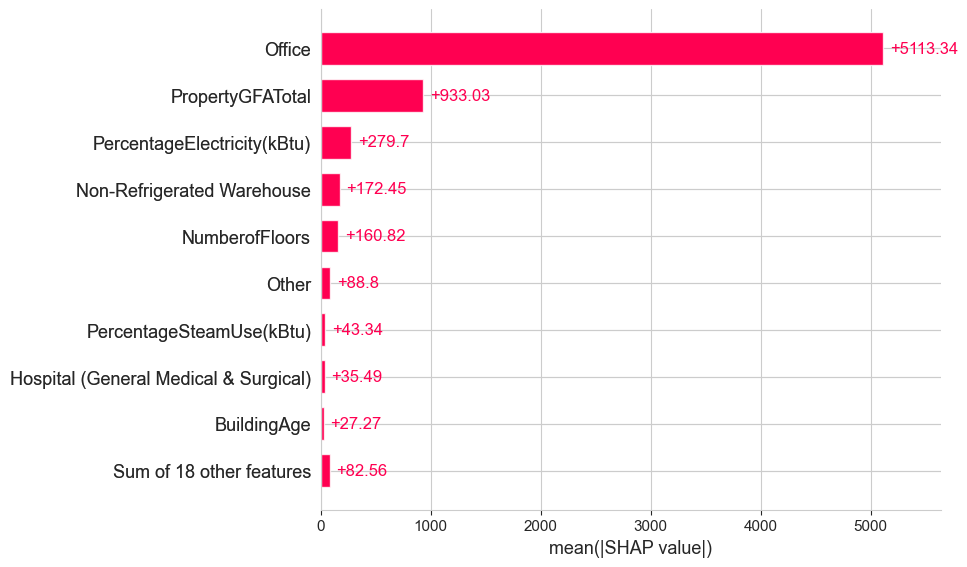

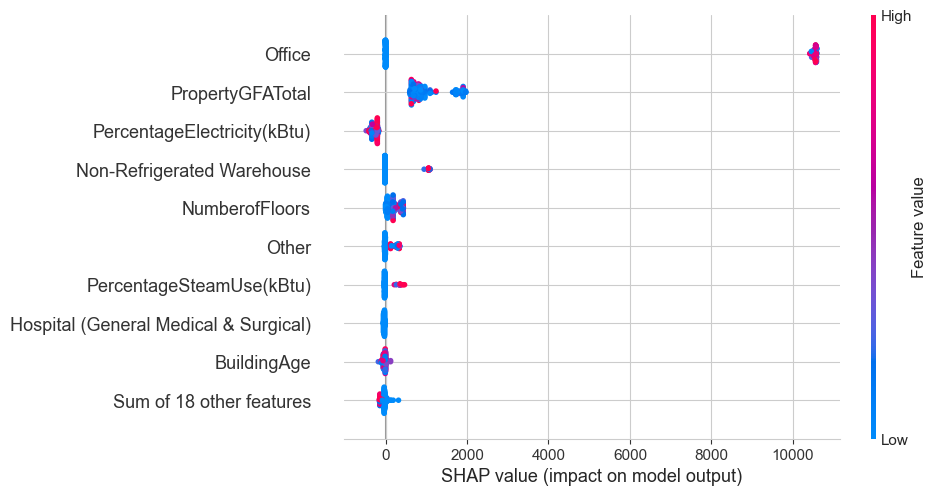

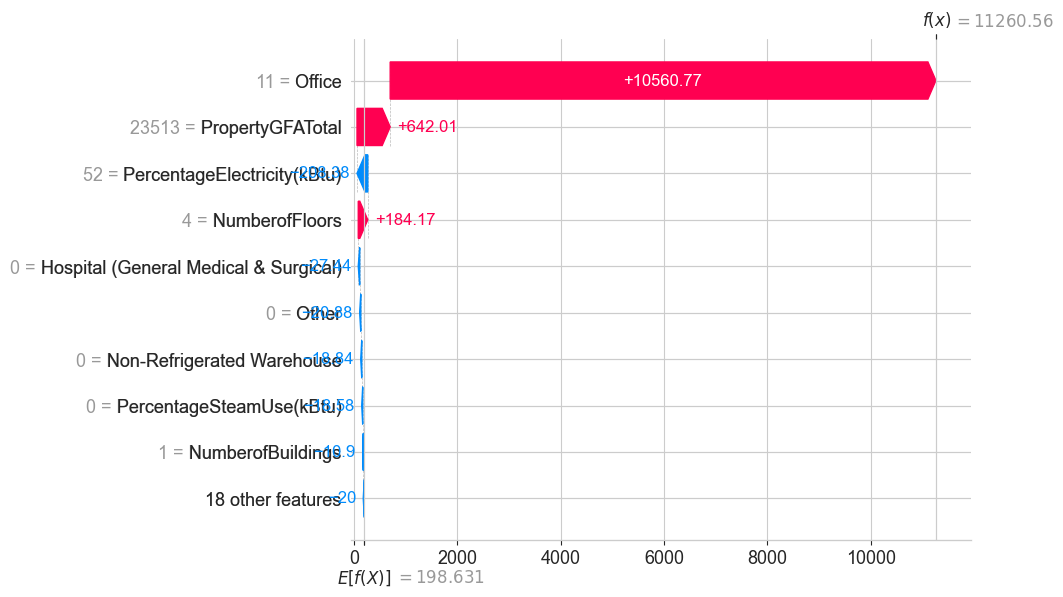

In [61]:
explainer = shap.TreeExplainer(XGBest.steps[1][1])
shap_values = explainer(X_test)

#print(shap_values2)
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)
shap.plots.waterfall(shap_values[50])

## GradientBoostingRegressor

### X_V1

In [62]:
params = {
    'n_estimators': [500, 700],  # Number of boosting stages (trees)
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [6, 7, 8],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'V1'] = GradientBoostingRegressor.best_score_

resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
34,0.824066,0.078623,0.007822,0.001970,0.1,8,log2,500,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.634727,0.195647,1,0.999996,1.099126e-06
35,1.040204,0.026515,0.009127,0.000664,0.1,8,log2,700,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.634685,0.195670,2,1.000000,1.289649e-07
20,0.693725,0.058449,0.006618,0.000797,0.1,7,log2,500,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.629644,0.207591,3,0.999980,2.533242e-06
21,0.996695,0.070728,0.008527,0.001144,0.1,7,log2,700,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.629520,0.207627,4,0.999996,5.369385e-07
0,0.676843,0.058044,0.005211,0.000509,0.1,6,sqrt,500,"{'learning_rate': 0.1, 'max_depth': 6, 'max_fe...",0.626919,0.196856,5,0.999930,1.141195e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.345452,0.121799,0.011427,0.003402,0.2,8,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 8, 'max_fe...",0.360801,0.238545,68,1.000000,4.530744e-14
52,0.742655,0.006824,0.006628,0.000808,0.2,7,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.355764,0.319400,69,1.000000,5.178418e-08
53,1.038012,0.021198,0.008424,0.000731,0.2,7,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.355762,0.319395,70,1.000000,1.547887e-09
62,0.900131,0.073544,0.006632,0.000489,0.2,8,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 8, 'max_fe...",0.339647,0.290708,71,1.000000,2.229540e-10


### X_V2

In [63]:
params = {
    'n_estimators': [300, 500, 700],  # Number of boosting stages (trees)
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [7, 8, 9],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'V2'] = GradientBoostingRegressor.best_score_


resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
34,0.764163,0.056658,0.007430,0.001170,0.1,8,log2,500,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.677224,0.210541,1,0.999994,2.283322e-06
35,0.987029,0.027206,0.009324,0.000602,0.1,8,log2,700,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.677220,0.210530,2,0.999999,3.197795e-07
33,0.448236,0.022754,0.004914,0.000488,0.1,8,log2,300,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.677149,0.210646,3,0.999933,1.758288e-05
0,0.454496,0.045000,0.004215,0.000686,0.1,7,sqrt,300,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.666122,0.228357,4,0.999916,1.988721e-05
1,0.776751,0.084002,0.007226,0.001415,0.1,7,sqrt,500,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.665888,0.228383,5,0.999992,1.851276e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.727651,0.014856,0.006311,0.000508,0.2,7,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.501171,0.293544,104,1.000000,2.439079e-08
59,1.090297,0.099024,0.008824,0.001293,0.2,7,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.501158,0.293551,105,1.000000,3.635451e-10
63,0.424062,0.036292,0.005115,0.000800,0.2,7,log2,300,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.489031,0.316601,106,0.999995,1.120220e-06
65,0.998101,0.098121,0.009325,0.001813,0.2,7,log2,700,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.488962,0.316667,107,1.000000,1.023372e-09


### X_V3

In [64]:
params = {
    'n_estimators': [500, 700],  # Number of boosting stages (trees)
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [6, 7, 8],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal 
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'V3'] = GradientBoostingRegressor.best_score_

resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
7,0.983179,0.077717,0.008222,0.002172,0.1,6,log2,700,"{'learning_rate': 0.1, 'max_depth': 6, 'max_fe...",0.571922,0.230096,1,0.999987,2.899066e-06
6,0.709681,0.056957,0.006110,0.001162,0.1,6,log2,500,"{'learning_rate': 0.1, 'max_depth': 6, 'max_fe...",0.571777,0.230277,2,0.999944,1.518716e-05
31,1.255900,0.076024,0.008924,0.000665,0.1,8,log2,700,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.536417,0.180444,3,1.000000,9.028903e-09
30,0.899678,0.074868,0.007020,0.000316,0.1,8,log2,500,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.536410,0.180453,4,0.999999,1.462255e-07
32,0.904172,0.076538,0.007022,0.000321,0.1,8,log2,500,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.528830,0.217777,5,0.999998,4.454044e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.915463,0.079665,0.006121,0.001032,0.2,7,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.224301,0.466892,68,1.000000,1.137078e-08
50,0.935514,0.076911,0.006617,0.001158,0.2,7,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.144145,0.534047,69,1.000000,4.566950e-09
51,1.218997,0.022948,0.008030,0.000324,0.2,7,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.144143,0.534047,70,1.000000,1.657404e-10
41,1.132663,0.085434,0.007523,0.001484,0.2,6,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.131322,0.469361,71,1.000000,3.226241e-08


### X_V4

In [65]:
params = {
    'n_estimators': [500, 700],  # Number of boosting stages (trees)
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [6, 7, 8],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal 
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V4, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'V4'] = GradientBoostingRegressor.best_score_

resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
42,0.647809,0.056728,0.005313,0.000818,0.2,6,log2,500,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.601424,0.238898,1,0.999997,8.338455e-07
43,0.880699,0.072881,0.007324,0.000600,0.2,6,log2,700,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.601390,0.238907,2,1.000000,7.013845e-08
18,0.725952,0.036687,0.006013,0.000554,0.1,7,log2,500,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.584762,0.237747,3,0.999989,2.363142e-06
19,1.019922,0.071667,0.007620,0.000798,0.1,7,log2,700,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.584757,0.237743,4,0.999999,3.233442e-07
21,0.990778,0.077869,0.008726,0.002044,0.1,7,log2,700,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.580700,0.192789,5,0.999997,5.175853e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.758088,0.014357,0.005913,0.000587,0.2,7,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.347394,0.298455,68,1.000000,2.326484e-08
41,0.952706,0.068459,0.007338,0.000415,0.2,6,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.283389,0.392078,69,1.000000,6.286345e-08
40,0.736401,0.048038,0.006415,0.001888,0.2,6,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.283381,0.391993,70,0.999996,5.783491e-07
58,0.723829,0.062587,0.006211,0.000810,0.2,7,log2,500,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.201837,0.608658,71,0.999999,1.534009e-07


### Avec Transformation sur X_V2

In [66]:
pipeline = make_pipeline(RobustScaler(), ensemble.GradientBoostingRegressor(random_state=0))

params = {
    'gradientboostingregressor__n_estimators': [500, 700],  # Number of boosting stages (trees)
    'gradientboostingregressor__learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'gradientboostingregressor__max_depth': [6, 7, 8],  # Maximum depth of each tree
    'gradientboostingregressor__min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal 
    'gradientboostingregressor__max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'WithTransform'] = GradientBoostingRegressor.best_score_

resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__learning_rate,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__max_features,param_gradientboostingregressor__n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
34,0.771982,0.064575,0.007215,0.000680,0.1,8,log2,500,{'gradientboostingregressor__learning_rate': 0...,0.677016,0.210515,1,0.999994,2.283322e-06
35,1.040276,0.079493,0.009026,0.000318,0.1,8,log2,700,{'gradientboostingregressor__learning_rate': 0...,0.677009,0.210506,2,0.999999,3.197795e-07
12,0.740326,0.021107,0.006423,0.000378,0.1,7,sqrt,500,{'gradientboostingregressor__learning_rate': 0...,0.665641,0.228217,3,0.999992,1.851276e-06
13,1.179472,0.097333,0.007828,0.000240,0.1,7,sqrt,700,{'gradientboostingregressor__learning_rate': 0...,0.665502,0.228250,4,0.999999,2.566558e-07
2,0.688305,0.049467,0.006014,0.000711,0.1,6,sqrt,500,{'gradientboostingregressor__learning_rate': 0...,0.656333,0.213709,5,0.999907,1.923580e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.660561,0.016338,0.006620,0.000588,0.2,7,log2,500,{'gradientboostingregressor__learning_rate': 0...,0.488871,0.316823,68,1.000000,2.569437e-08
47,0.853643,0.117240,0.007018,0.000638,0.2,6,log2,700,{'gradientboostingregressor__learning_rate': 0...,0.488837,0.236585,69,0.999998,6.415139e-07
46,0.659926,0.066077,0.005728,0.000672,0.2,6,log2,500,{'gradientboostingregressor__learning_rate': 0...,0.488748,0.236669,70,0.999986,3.049644e-06
8,0.587810,0.048313,0.013541,0.011669,0.1,6,log2,500,{'gradientboostingregressor__learning_rate': 0...,0.488150,0.292015,71,0.999843,1.047393e-05


In [67]:
%%timeit
y_pred_time = GradientBoostingRegressor.best_estimator_.predict(X_V2bis)

17.2 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [68]:
GradientBoostingRegressorBest = GradientBoostingRegressor.best_estimator_
fi = pd.DataFrame({'feature':X_test.columns, 'importance':GradientBoostingRegressorBest[1].feature_importances_})
fi.sort_values('importance', ascending=False)

,feature,importance
1,PropertyGFATotal,0.285277
8,PrimaryPropertyType_Hospital,0.241804
6,PercentageElectricity(kBtu),0.162438
2,NumberofBuildings,0.075539
5,PercentageSteamUse(kBtu),0.064656
3,NumberofFloors,0.051850
14,PrimaryPropertyType_Mixed Use Property,0.037555
0,BuildingAge,0.033489
4,PercentagePropertyGFABuildings,0.013323
12,PrimaryPropertyType_Large Office,0.010821


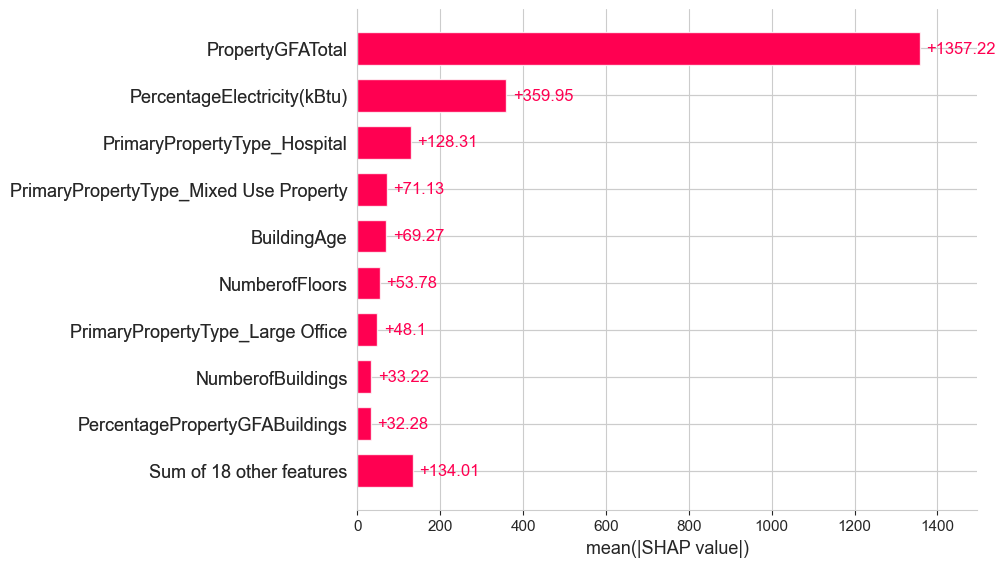

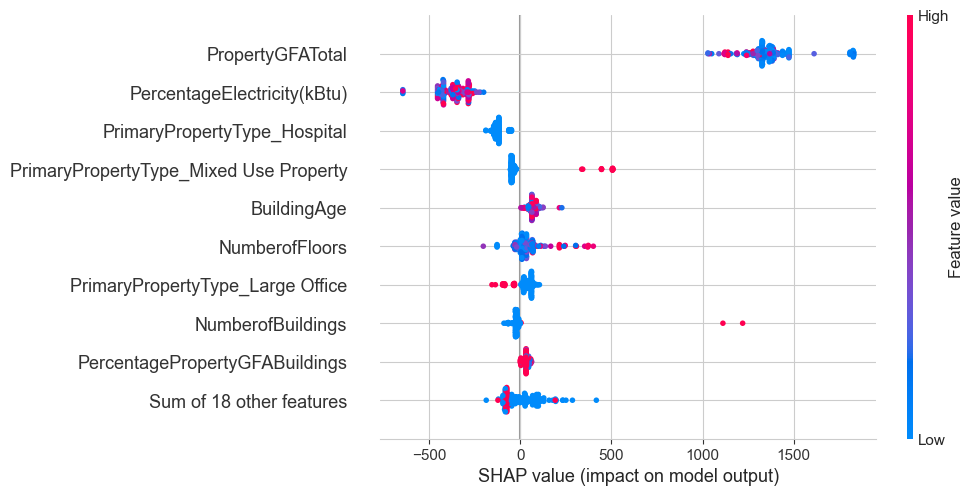

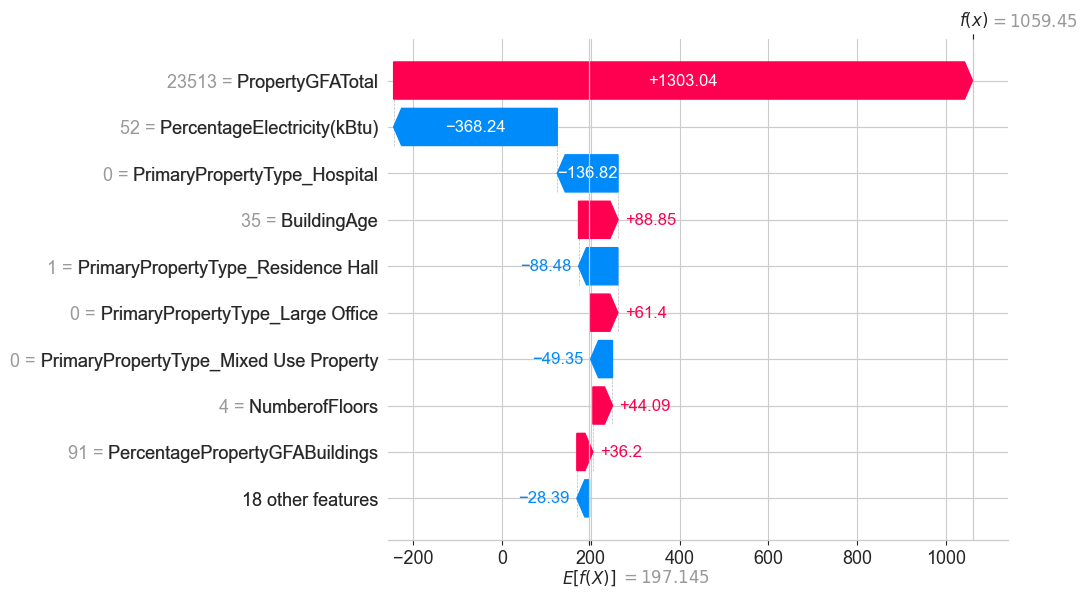

In [69]:
explainer2 = shap.TreeExplainer(GradientBoostingRegressorBest.steps[1][1])
shap_values2 = explainer2(X_test)

#print(shap_values2)
shap.plots.bar(shap_values2)
shap.plots.beeswarm(shap_values2)
shap.plots.waterfall(shap_values2[50])

## RandomForest

### X_V1

In [70]:
params = {
    'n_estimators': [100, 300],  # Number of trees in the forest
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(ensemble.RandomForestRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'V1'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
19,1.261186,0.086307,0.028397,0.002187,None,log2,1.0,300,"{'max_depth': None, 'max_features': 'log2', 'm...",0.572078,0.169933,1,0.926997,0.012714
18,0.404615,0.031296,0.010431,0.000917,None,log2,1.0,100,"{'max_depth': None, 'max_features': 'log2', 'm...",0.571356,0.171994,2,0.925116,0.010775
7,1.365525,0.134447,0.029182,0.003332,None,sqrt,1.0,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.568444,0.174141,3,0.928248,0.010556
12,0.357362,0.027134,0.010629,0.000966,None,log2,0.7,100,"{'max_depth': None, 'max_features': 'log2', 'm...",0.552220,0.167254,4,0.860730,0.011405
9,1.017453,0.064098,0.025368,0.003390,None,sqrt,1.0,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.545293,0.166852,5,0.804551,0.032452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0.373198,0.026921,0.016062,0.001821,3,sqrt,0.7,300,"{'max_depth': 3, 'max_features': 'sqrt', 'max_...",0.358442,0.120932,92,0.454227,0.054649
46,0.117516,0.002133,0.006624,0.000672,3,log2,1.0,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.357304,0.113058,93,0.429060,0.063272
47,0.380601,0.020531,0.017347,0.004243,3,log2,1.0,300,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.348217,0.104783,94,0.429681,0.068658
40,0.118865,0.007966,0.008018,0.003023,3,log2,0.7,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.336320,0.105985,95,0.407250,0.055858


### X_V2

In [71]:
params = {
    'n_estimators': [50, 100, 300],  # Number of trees in the forest
    'max_depth': [None, 30, 50, 60],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(ensemble.RandomForestRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'V2'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
117,0.226940,0.019176,0.006318,0.000811,60,sqrt,1.0,50,"{'max_depth': 60, 'max_features': 'sqrt', 'max...",0.636448,0.205378,1,0.938596,0.015431
81,0.257930,0.025505,0.008426,0.001914,50,sqrt,1.0,50,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.636448,0.205378,1,0.938596,0.015431
9,0.216286,0.015241,0.006316,0.000685,None,sqrt,1.0,50,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.636448,0.205378,1,0.938596,0.015431
118,0.452532,0.030583,0.011330,0.001670,60,sqrt,1.0,100,"{'max_depth': 60, 'max_features': 'sqrt', 'max...",0.630345,0.199569,4,0.930128,0.012133
82,0.462909,0.041236,0.012024,0.002630,50,sqrt,1.0,100,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.630345,0.199569,4,0.930128,0.012133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.126234,0.001879,0.005110,0.000736,30,log2,0.7,50,"{'max_depth': 30, 'max_features': 'log2', 'max...",0.437890,0.149608,140,0.762306,0.044393
60,0.140033,0.034555,0.007218,0.001287,30,log2,0.7,50,"{'max_depth': 30, 'max_features': 'log2', 'max...",0.417053,0.166888,141,0.658816,0.042935
96,0.125050,0.005983,0.005712,0.000813,50,log2,0.7,50,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.416557,0.167822,142,0.659387,0.042897
132,0.106217,0.002662,0.004709,0.000604,60,log2,0.7,50,"{'max_depth': 60, 'max_features': 'log2', 'max...",0.416557,0.167822,142,0.659387,0.042897


### X_V3

In [72]:
params = {
    'n_estimators': [100, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 30, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(ensemble.RandomForestRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'V3'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
91,1.357856,0.099506,0.027087,0.000896,50,log2,1.0,300,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.491603,0.183037,1,0.925183,0.013033
19,1.451938,0.148880,0.033790,0.006923,None,log2,1.0,300,"{'max_depth': None, 'max_features': 'log2', 'm...",0.491517,0.182981,2,0.925183,0.013033
61,1.171769,0.093090,0.028685,0.002614,30,log2,0.7,300,"{'max_depth': 30, 'max_features': 'log2', 'max...",0.489450,0.169596,3,0.861815,0.014030
67,1.470635,0.110932,0.031576,0.003308,30,log2,1.0,300,"{'max_depth': 30, 'max_features': 'log2', 'max...",0.480307,0.182561,4,0.924810,0.011726
90,0.477013,0.027531,0.010434,0.001591,50,log2,1.0,100,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.478549,0.200212,5,0.923025,0.010739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.373853,0.030928,0.010227,0.002043,None,sqrt,1.0,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.349716,0.230293,91,0.789362,0.019598
59,1.028474,0.076606,0.024457,0.004798,30,sqrt,1.0,300,"{'max_depth': 30, 'max_features': 'sqrt', 'max...",0.344174,0.200913,93,0.784193,0.015870
35,0.669411,0.053063,0.017564,0.001139,10,sqrt,1.0,300,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.339905,0.199828,94,0.780372,0.014724
58,0.356973,0.029098,0.008921,0.001465,30,sqrt,1.0,100,"{'max_depth': 30, 'max_features': 'sqrt', 'max...",0.336998,0.223672,95,0.785336,0.017240


### X_V4

In [73]:
params = {
    'n_estimators': [100, 300],  # Number of trees in the forest
    'max_depth': [None, 3, 10, 30, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(ensemble.RandomForestRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'V4'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
85,1.076880,0.026212,0.026588,0.002341,30,log2,0.7,300,"{'max_depth': 30, 'max_features': 'log2', 'max...",0.495009,0.175345,1,0.869349,0.015897
13,1.183226,0.087287,0.029484,0.004061,None,log2,0.7,300,"{'max_depth': None, 'max_features': 'log2', 'm...",0.494339,0.172645,2,0.867570,0.014772
109,1.535299,0.294907,0.038451,0.015073,50,log2,0.7,300,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.494339,0.172645,2,0.867570,0.014772
84,0.359104,0.005914,0.009822,0.000245,30,log2,0.7,100,"{'max_depth': 30, 'max_features': 'log2', 'max...",0.488856,0.185995,4,0.864725,0.018063
108,0.399537,0.025899,0.012616,0.002893,50,log2,0.7,100,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.488847,0.178665,5,0.864492,0.019676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.135611,0.007860,0.008022,0.001414,3,sqrt,1.0,100,"{'max_depth': 3, 'max_features': 'sqrt', 'max_...",0.283600,0.187759,116,0.694306,0.019029
29,0.433276,0.024296,0.017138,0.002694,3,sqrt,0.7,300,"{'max_depth': 3, 'max_features': 'sqrt', 'max_...",0.280133,0.148713,117,0.611096,0.019236
46,0.128083,0.010775,0.006520,0.000705,3,log2,1.0,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.278366,0.133734,118,0.605581,0.016234
34,0.140680,0.011716,0.007233,0.000687,3,sqrt,1.0,100,"{'max_depth': 3, 'max_features': 'sqrt', 'max_...",0.262552,0.165853,119,0.662456,0.019852


### Avec Transformation sur X_V2

In [74]:
pipeline = make_pipeline(RobustScaler(), ensemble.RandomForestRegressor(random_state=0))

params = {
    'randomforestregressor__n_estimators': [100, 300],  # Number of trees in the forest
    'randomforestregressor__max_depth': [None, 10, 30, 50],  # Maximum depth of the trees
    'randomforestregressor__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'randomforestregressor__max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'randomforestregressor__max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'WithTransform'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__max_features,param_randomforestregressor__max_samples,param_randomforestregressor__n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
6,0.461305,0.037698,0.011114,0.001857,None,sqrt,1.0,100,"{'randomforestregressor__max_depth': None, 'ra...",0.629887,0.199291,1,0.930005,0.012110
78,0.477457,0.055224,0.011136,0.001124,50,sqrt,1.0,100,"{'randomforestregressor__max_depth': 50, 'rand...",0.629887,0.199291,1,0.930005,0.012110
54,0.450844,0.014390,0.010929,0.000916,30,sqrt,1.0,100,"{'randomforestregressor__max_depth': 30, 'rand...",0.609456,0.192040,3,0.932275,0.011927
19,1.499252,0.292802,0.030195,0.004118,None,log2,1.0,300,"{'randomforestregressor__max_depth': None, 'ra...",0.602265,0.193634,4,0.930166,0.010201
91,1.273094,0.041715,0.031886,0.006532,50,log2,1.0,300,"{'randomforestregressor__max_depth': 50, 'rand...",0.602265,0.193634,4,0.930166,0.010201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0.640787,0.141213,0.016944,0.001852,10,sqrt,0.7,300,"{'randomforestregressor__max_depth': 10, 'rand...",0.443886,0.150447,92,0.644099,0.030131
41,0.538427,0.055122,0.018051,0.001129,10,log2,0.7,300,"{'randomforestregressor__max_depth': 10, 'rand...",0.441019,0.134353,93,0.613050,0.038385
88,0.237685,0.015125,0.009138,0.000807,50,log2,0.7,100,"{'randomforestregressor__max_depth': 50, 'rand...",0.440232,0.143640,94,0.631961,0.039818
16,0.261471,0.042485,0.011414,0.004205,None,log2,0.7,100,"{'randomforestregressor__max_depth': None, 'ra...",0.440232,0.143640,94,0.631961,0.039818


# RESULTS

Pour quasiment tous mes tests, nous avons un meilleur score sur les modèles "bis" ne comportant pas les features 'BuildingType' et 'Neighborhood'.  
On peut en conclure que ces 2 features sont inutiles à notre prédiction et les prendre en compte ne ferait qu'accentuer un potentiel problème d'overfitting.

In [75]:
results = results.apply(pd.to_numeric, errors='ignore')
results = results.round(3)
results

,V1,V2,V3,V4,WithTransform
DummyRegressor,NaN,-0.020,NaN,NaN,NaN
LinearRegressor,0.018,0.103,-0.081,-0.045,0.103
Lasso,0.259,0.331,0.103,0.176,0.073
Ridge,0.316,0.372,0.282,0.319,0.374
ElasticNet,0.316,0.372,0.280,0.319,0.374
XGBRegressor,0.600,0.632,0.495,0.548,0.683
GradientBoostingRegressor,0.635,0.677,0.572,0.601,0.677
RandomForest,0.572,0.636,0.492,0.495,0.630


On voit que les modèles type arbre de décision sont les plus performants.  
Les deux meilleurs semblent être XGBRegressor et GradientBoostingRegressor, avec une légère avance pour le premier.  
J'ai réalisé un test de temps de calcul entre les deux et c'est XGBRegressor qui est également le plus rapide.  
C'est donc ce dernier que nous allons choisir.  

Dans mon cas, les modèles qui utilisent la OneHotEncoding intelligent sont souvent moins performants que ceux qui utilise la version simplifiée.  
Par contre losqu'on applique une transformation sur les features, notament un PowerTransformer, le score des OneHotEncoding intelligent monte significativement contrairement aux modèles avec OneHotEncoding simplifié, passant parfois devant comme avec notre XGBRegressor.

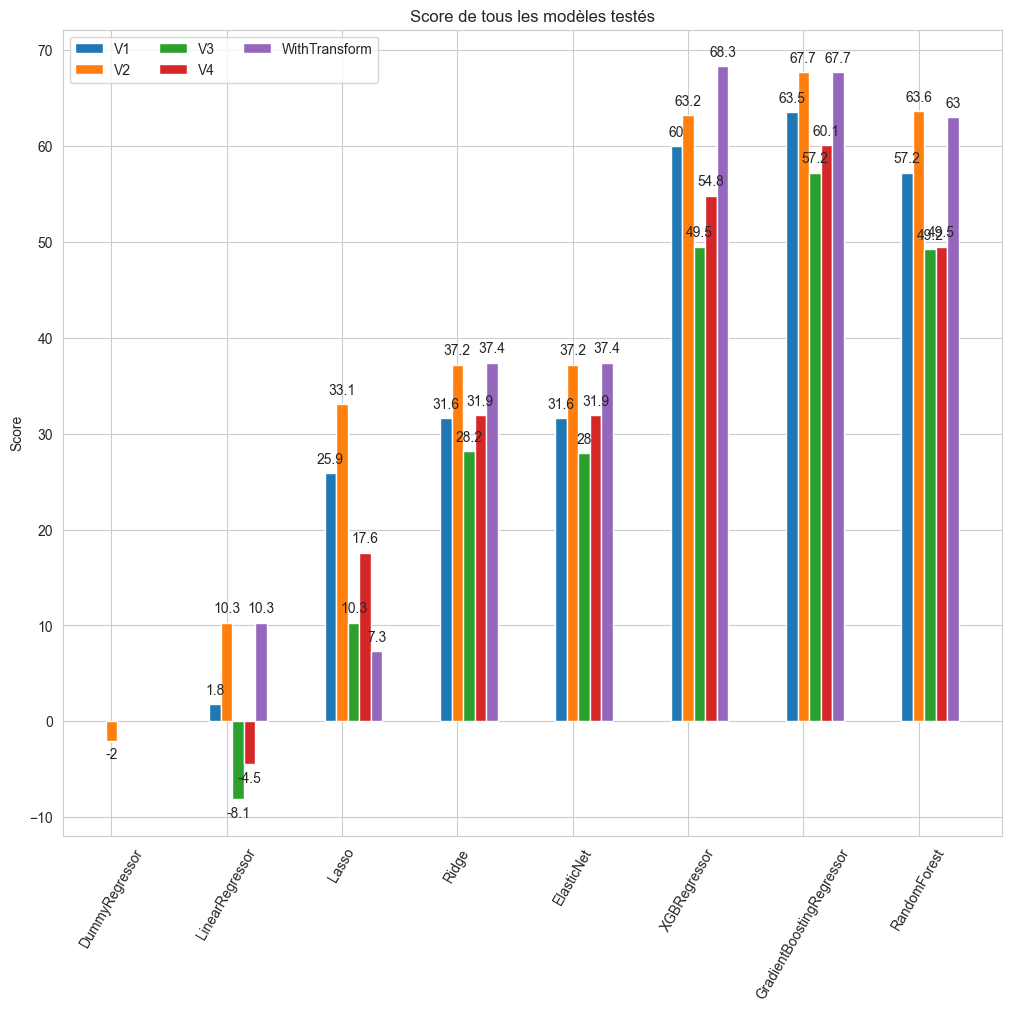

In [77]:
results_to_dict = (results*100).to_dict(orient='list')

x = np.arange(len(results.index))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10,10))

for attribute, measurement in results_to_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Score de tous les modèles testés')
ax.set_xticks(x + width, results.index, rotation=60)
ax.legend(loc='upper left', ncols=3)

plt.show()

# Energy Score

## Evaluation de l'Energy Score sans remplir les données manquantes

In [33]:
data_ESmissing = data[~pd.isna(data['ENERGYSTARScore'])].reset_index(drop=True)

col_ESmissing = [
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage',
    'BuildingAge', 'PropertyGFATotal', 
    'PercentagePropertyGFABuildings', 'NumberofBuildings', 'NumberofFloors',
    'ENERGYSTARScore', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)'
]

X_ESmissing = data_ESmissing[col_ESmissing]

y_ESmissing = data_ESmissing['TotalGHGEmissions']


bins_TotalGHGEmissionsESmissing = pd.qcut(data_ESmissing['TotalGHGEmissions'], q=10, labels=False, precision=0)
data_ESmissing['bins_TotalGHGEmissionsESmissing'] = bins_TotalGHGEmissionsESmissing

y_class_ESmissing = data_ESmissing['bins_TotalGHGEmissionsESmissing']



In [34]:
LstLargestLower10 = data['LargestPropertyUseType'].value_counts()[data['LargestPropertyUseType'].value_counts()<10].index.tolist()


for i in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
    for j in ['Wholesale Club/Supercenter']:
        X_ESmissing.loc[X_ESmissing[i]==j, i] = 'Supermarket/Grocery Store'
    for j in ['Other - Entertainment/Public Assembly', 'Other - Recreation']:
        X_ESmissing.loc[X_ESmissing[i]==j, i] = 'Other'
    for j in LstLargestLower10:
        X_ESmissing.loc[X_ESmissing[i]==j, i] = 'Other'

In [35]:
lst_1largest_ES = X_ESmissing['LargestPropertyUseType'].unique().tolist()


for value in lst_1largest_ES:
    X_ESmissing[value]=0.0
for index, row in X_ESmissing.iterrows():
    X_ESmissing.loc[index, row['LargestPropertyUseType']] = row['LargestPropertyUseTypeGFAPourcentage']
    if pd.notna(row['SecondLargestPropertyUseType']):
        if row['SecondLargestPropertyUseType'] in lst_1largest_ES:
            X_ESmissing.loc[index, row['SecondLargestPropertyUseType']] = row['SecondLargestPropertyUseTypeGFAPourcentage']
        else:
            X_ESmissing.loc[index, 'Other'] = row['SecondLargestPropertyUseTypeGFAPourcentage']
    if pd.notna(row['ThirdLargestPropertyUseType']):
        if row['ThirdLargestPropertyUseType'] in lst_1largest_ES:
            X_ESmissing.loc[index, row['ThirdLargestPropertyUseType']] = row['ThirdLargestPropertyUseTypeGFAPourcentage']
        else:
            X_ESmissing.loc[index, 'Other'] = row['ThirdLargestPropertyUseTypeGFAPourcentage']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [36]:
X_ESmissing.drop(columns=[
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage'
], inplace=True)

Prédiction sans utiliser l'EnergyStarScore :

In [37]:
pipeline = make_pipeline(PowerTransformer(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4, 5],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_ESmissing.drop(columns=['ENERGYSTARScore']), y_ESmissing, test_size=0.15, random_state=15, stratify=y_class_ESmissing)

XGBRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
48,0.157409,0.035198,0.004591,0.000379,0.7,0.2,3,300,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.690120,0.214743,1,0.999327,0.000215
123,0.243729,0.050966,0.005408,0.000663,0.8,0.1,3,500,0.8,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.689936,0.214548,2,0.999115,0.000216
51,0.210991,0.011113,0.004705,0.000749,0.7,0.2,3,500,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.688913,0.214456,3,0.999795,0.000071
231,0.209437,0.009850,0.004705,0.000602,0.9,0.1,3,500,0.8,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.688399,0.221302,4,0.999149,0.000189
45,0.088851,0.006978,0.004072,0.000095,0.7,0.2,3,100,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.688366,0.213617,5,0.995868,0.001277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.079795,0.005860,0.003804,0.000401,0.8,0.1,2,100,1.0,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.526069,0.249288,320,0.970470,0.009069
254,0.075517,0.003170,0.003807,0.000400,0.9,0.2,2,100,1.0,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.521088,0.236437,321,0.986418,0.006108
290,0.107165,0.035659,0.004604,0.000490,0.9,0.3,2,100,1.0,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.516165,0.223119,322,0.992848,0.003376
146,0.075948,0.002881,0.003706,0.000511,0.8,0.2,2,100,1.0,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.513218,0.291337,323,0.987536,0.006083


Prédiction en utilisant l'Energy Star Score :

In [38]:
pipeline = make_pipeline(PowerTransformer(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4, 5],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_ESmissing, y_ESmissing, test_size=0.15, random_state=15, stratify=y_class_ESmissing)

XGBRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
295,0.180897,0.006865,0.004105,2.018930e-04,0.9,0.3,2,500,0.9,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.661311,0.187710,1,0.999545,1.411403e-04
292,0.130131,0.007466,0.004404,8.008957e-04,0.9,0.3,2,300,0.9,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.660814,0.188520,2,0.998879,3.568042e-04
187,0.175065,0.005280,0.004576,5.925805e-04,0.8,0.3,2,500,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.659629,0.206970,3,0.999548,1.448668e-04
184,0.126867,0.001542,0.004508,7.747687e-07,0.8,0.3,2,300,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.656908,0.210181,4,0.998836,4.079421e-04
172,0.113570,0.005319,0.004317,5.039604e-04,0.8,0.2,5,100,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.653279,0.232049,5,0.999705,6.305636e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.357734,0.005065,0.005908,3.745124e-04,0.7,0.3,5,500,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.391500,0.319659,320,1.000000,1.693730e-10
99,0.111547,0.003897,0.004007,4.470247e-04,0.7,0.3,5,100,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.390341,0.320057,321,0.999841,4.096085e-05
87,0.214994,0.006681,0.005508,1.518966e-03,0.7,0.3,3,500,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.346241,0.345759,322,0.999972,1.069592e-05
84,0.168707,0.020680,0.004305,4.006777e-04,0.7,0.3,3,300,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.344689,0.347237,323,0.999852,6.087806e-05


On a un score moins bon de 0.03 avec l'Energy Star Score.

## Remplissage des valeurs manquantes de Energy Score

In [40]:
dataToPredictES = data[['PrimaryPropertyType', 'BuildingAge', 'PropertyGFATotal', 'NumberofBuildings', 'NumberofFloors',
            'PercentagePropertyGFABuildings', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)', 'ENERGYSTARScore']]

categOHE = pd.get_dummies(dataToPredictES[['PrimaryPropertyType']]).astype(int)
dataToPredictES = pd.concat([dataToPredictES.drop(columns=['PrimaryPropertyType']), categOHE], axis=1)

Séparation du training et testing set en fonction du remplissage de la colonne ENERGYSTARScore.

In [41]:
data_withES = dataToPredictES[~pd.isna(data['ENERGYSTARScore'])]
data_noES = dataToPredictES[pd.isna(data['ENERGYSTARScore'])]

X_train_ES = data_withES.drop('ENERGYSTARScore', axis=1)
y_train_ES = data_withES['ENERGYSTARScore']

X_test_ES = data_noES.drop('ENERGYSTARScore', axis=1)
y_test_ES = data_noES['ENERGYSTARScore']

Calcul des meilleurs paramètres pour la prédiction.  

In [42]:
pipeline = make_pipeline(RobustScaler(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [30, 50, 100, 300],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.4, 0.5, 0.6, 0.7],  # Fraction of features used for building each tree
}

XGBRegressor2 = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor2.fit(X_train_ES, y_train_ES)

resultizeGrid(XGBRegressor2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
112,0.022630,0.001021,0.002303,0.000401,0.5,0.1,2,50,0.9,"{'xgbregressor__colsample_bytree': 0.5, 'xgbre...",0.073207,0.040029,1,0.198548,0.010229
4,0.022610,0.000378,0.002132,0.000354,0.4,0.1,2,50,0.9,"{'xgbregressor__colsample_bytree': 0.4, 'xgbre...",0.069685,0.036433,2,0.190636,0.009798
240,0.022330,0.000873,0.002402,0.000490,0.6,0.1,4,30,0.8,"{'xgbregressor__colsample_bytree': 0.6, 'xgbre...",0.069431,0.025026,3,0.315281,0.008324
232,0.025503,0.000572,0.002280,0.000631,0.6,0.1,3,50,0.9,"{'xgbregressor__colsample_bytree': 0.6, 'xgbre...",0.068842,0.040067,4,0.297082,0.011187
132,0.021676,0.000367,0.002303,0.000401,0.5,0.1,4,30,0.8,"{'xgbregressor__colsample_bytree': 0.5, 'xgbre...",0.068316,0.022632,5,0.301130,0.006877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.113314,0.003654,0.004606,0.002960,0.5,0.3,4,300,0.9,"{'xgbregressor__colsample_bytree': 0.5, 'xgbre...",-0.290295,0.119899,428,0.964329,0.002117
431,0.086107,0.011638,0.002316,0.000615,0.7,0.3,4,300,1.0,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",-0.302588,0.141175,429,0.971476,0.005068
213,0.109818,0.001275,0.003123,0.000195,0.5,0.3,4,300,0.8,"{'xgbregressor__colsample_bytree': 0.5, 'xgbre...",-0.310618,0.105907,430,0.962142,0.003159
321,0.118013,0.002890,0.003603,0.000491,0.6,0.3,4,300,0.8,"{'xgbregressor__colsample_bytree': 0.6, 'xgbre...",-0.324403,0.102800,431,0.976004,0.002508


Application du meilleur modèle trouvé sur notre testing set, à savoir les individus sans ENERGYSTARScore.

In [43]:
y_test_ES = XGBRegressor2.predict(X_test_ES)

Création d'un nouveau DataFrame identique au premier mais en remplissant avec les nouvelles données précédemment prédites.

In [44]:
dataWithESFull = data.copy()
cpt=0
for x in dataWithESFull[pd.isna(data['ENERGYSTARScore'])].index:
    dataWithESFull.loc[x, 'ENERGYSTARScore'] = y_test_ES[cpt]
    cpt=cpt+1

## Utilisation de Energy Score avec les valeurs prédites

In [45]:
col_WithESbest = [
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage',
    'BuildingAge', 'PropertyGFATotal', 
    'PercentagePropertyGFABuildings', 'NumberofBuildings', 'NumberofFloors',
    'ENERGYSTARScore', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)'
]

X_WithESbest = dataWithESFull[col_WithESbest]

In [46]:
LstLargestLower10 = dataWithESFull['LargestPropertyUseType'].value_counts()[dataWithESFull['LargestPropertyUseType'].value_counts()<10].index.tolist()


for i in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
    for j in ['Wholesale Club/Supercenter']:
        X_WithESbest.loc[X_WithESbest[i]==j, i] = 'Supermarket/Grocery Store'
    for j in ['Other - Entertainment/Public Assembly', 'Other - Recreation']:
        X_WithESbest.loc[X_WithESbest[i]==j, i] = 'Other'
    for j in LstLargestLower10:
        X_WithESbest.loc[X_WithESbest[i]==j, i] = 'Other'

In [47]:
lst_1largest_ES = X_WithESbest['LargestPropertyUseType'].unique().tolist()


for value in lst_1largest_ES:
    X_WithESbest[value]=0.0
for index, row in X_WithESbest.iterrows():
    X_WithESbest.loc[index, row['LargestPropertyUseType']] = row['LargestPropertyUseTypeGFAPourcentage']
    if pd.notna(row['SecondLargestPropertyUseType']):
        if row['SecondLargestPropertyUseType'] in lst_1largest_ES:
            X_WithESbest.loc[index, row['SecondLargestPropertyUseType']] = row['SecondLargestPropertyUseTypeGFAPourcentage']
        else:
            X_WithESbest.loc[index, 'Other'] = row['SecondLargestPropertyUseTypeGFAPourcentage']
    if pd.notna(row['ThirdLargestPropertyUseType']):
        if row['ThirdLargestPropertyUseType'] in lst_1largest_ES:
            X_WithESbest.loc[index, row['ThirdLargestPropertyUseType']] = row['ThirdLargestPropertyUseTypeGFAPourcentage']
        else:
            X_WithESbest.loc[index, 'Other'] = row['ThirdLargestPropertyUseTypeGFAPourcentage']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [48]:
X_WithESbest.drop(columns=[
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage'
], inplace=True)

In [49]:
pipeline = make_pipeline(PowerTransformer(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [300, 500, 700, 1000],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4, 5],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_WithESbest, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
269,0.371506,0.009105,0.006289,0.000612,0.8,0.2,2,1000,0.8,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.677151,0.227338,1,0.998128,3.415122e-04
265,0.274833,0.007041,0.005507,0.000550,0.8,0.2,2,700,0.8,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.676372,0.228456,2,0.996910,5.456468e-04
73,0.304774,0.025612,0.006108,0.001322,0.7,0.2,2,700,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.675392,0.232095,3,0.996887,4.854124e-04
233,0.472844,0.018988,0.007450,0.000371,0.8,0.1,4,700,0.8,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.674674,0.194716,4,0.999761,3.484512e-05
65,0.175497,0.016927,0.005709,0.000749,0.7,0.2,2,300,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.674668,0.235820,5,0.991668,1.177261e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.479520,0.071185,0.007910,0.001395,0.7,0.3,3,1000,0.7,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.549548,0.261391,572,0.999965,7.985097e-06
482,0.260787,0.028626,0.007109,0.002226,0.9,0.2,4,300,0.9,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.533347,0.291506,573,0.999670,4.853159e-05
494,0.706496,0.029202,0.008811,0.000602,0.9,0.2,4,1000,0.9,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.533235,0.291694,574,0.999999,2.617035e-07
486,0.390472,0.039822,0.006409,0.000489,0.9,0.2,4,500,0.9,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.533210,0.291866,575,0.999944,9.475877e-06


In [51]:
BestXGB = XGBRegressor.best_estimator_

fi = pd.DataFrame({'feature':X_WithESbest.columns, 'importance':BestXGB[1].feature_importances_})
fi.sort_values('importance', ascending=False)

,feature,importance
12,Office,0.416109
19,Hospital (General Medical & Surgical),0.389625
1,PropertyGFATotal,0.036596
6,PercentageSteamUse(kBtu),0.033153
3,NumberofBuildings,0.024117
4,NumberofFloors,0.022936
5,ENERGYSTARScore,0.019536
7,PercentageElectricity(kBtu),0.015744
25,Laboratory,0.013178
26,Supermarket/Grocery Store,0.004108


L'ENEGYSTARSCORE n'est que très peu impactant et n'a pas amélioré notre score final.  
Pire, lorsqu'on l'a utilisé sans la prédire seulement sur les individus qui la possédait par défaut, elle a fait baisser notre score.  
L'intégration de cette feature n'est donc pas utile à la prédiction des émissions de gaz à effet de serre.